**Table of contents**<a id='toc0_'></a>    
- [Data Mining Lab 2 - Phase 2](#toc1_)    
  - [Before Starting](#toc1_1_)    
  - [Introduction](#toc1_2_)    
  - [**1. Data Preparation**](#toc1_3_)    
  - [**1.1 Load data**](#toc1_4_)    
    - [**1.2 Save data**](#toc1_4_1_)    
  - [**2. Large Language Models (LLMs)**](#toc1_5_)    
    - [Open-Source vs. Proprietary LLMs](#toc1_5_1_)    
    - [Why Use Code (API) for Data Mining?](#toc1_5_2_)    
    - [The Gemini API](#toc1_5_3_)    
    - [Interacting with the Gemini API](#toc1_5_4_)    
    - [**2.1 Text Prompting**](#toc1_5_5_)    
        - [**>>> Exercise 1 (Take home):**](#toc1_5_5_1_1_)    
    - [**2.2 Structured Output**](#toc1_5_6_)    
        - [**>>> Exercise 2 (Take home):**](#toc1_5_6_1_1_)    
    - [**2.3 Information Extraction and Grounding:**](#toc1_5_7_)    
      - [**`langextract`: A Library for Grounded Extraction**](#toc1_5_7_1_)    
        - [**2.3.1 Using PDF Documents:**](#toc1_5_7_1_1_)    
        - [**>>> Bonus Exercise 3 (Take home):**](#toc1_5_7_1_2_)    
    - [**2.4 Generating LLM Embeddings:**](#toc1_5_8_)    
        - [**>>> Exercise 4 (Take home):**](#toc1_5_8_1_1_)    
    - [**2.5 Retrieval-Augmented Generation (RAG)**](#toc1_5_9_)    
        - [**Actual answer in the URL:**](#toc1_5_9_1_1_)    
        - [**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc1_5_9_1_2_)    
        - [**>>> Bonus Exercise 5 (Take home):**](#toc1_5_9_1_3_)    
    - [**2.6 Few-Shot Prompting Classification:**](#toc1_5_10_)    
        - [**>>> Exercise 6 (Take home):**](#toc1_5_10_1_1_)    
        - [**>>> Exercise 7 (Take home):**](#toc1_5_10_1_2_)    
    - [**2.7 Extra LLM Related Materials:**](#toc1_5_11_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Data Mining Lab 2 - Phase 2](#toc0_)
In this lab's phase 2 session we will focus on exploring some basic LLMs' applications with data.


## <a id='toc1_1_'></a>[Before Starting](#toc0_)

**Make sure you have installed all the required libraries and you have the environment ready to run this lab.**
    

---
## <a id='toc1_2_'></a>[Introduction](#toc0_)

**Dataset:** [SemEval 2017 Task](https://competitions.codalab.org/competitions/16380)

**Task:** Classify text data into 4 different emotions using word embeddings and other deep information retrieval approaches.

![pic0.png](./pics/pic0.png)

---
## <a id='toc1_3_'></a>[**1. Data Preparation**](#toc0_)

---
## <a id='toc1_4_'></a>[**1.1 Load data**](#toc0_)

We start by loading the csv files into a single pandas dataframe for training and one for testing.

In [1]:
import pandas as pd

### training data
anger_train = pd.read_csv("data/semeval/train/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("data/semeval/train/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("data/semeval/train/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("data/semeval/train/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

In [2]:
# combine 4 sub-dataset
train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

In [3]:
### testing data
anger_test = pd.read_csv("data/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("data/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("data/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("data/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

# combine 4 sub-dataset
test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)
train_df.head()

,id,text,emotion,intensity
0,10000,How the fu*k! Who the heck! moved my fridge!.....,anger,0.938
1,10001,So my Indian Uber driver just called someone t...,anger,0.896
2,10002,@DPD_UK I asked for my parcel to be delivered ...,anger,0.896
3,10003,so ef whichever butt wipe pulled the fire alar...,anger,0.896
4,10004,Don't join @BTCare they put the phone down on ...,anger,0.896


In [4]:
# shuffle dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

In [5]:
print("Shape of Training df: ", train_df.shape)
print("Shape of Testing df: ", test_df.shape)

Shape of Training df:  (3613, 4)
Shape of Testing df:  (347, 4)


---
### <a id='toc1_4_1_'></a>[**1.2 Save data**](#toc0_)

In [6]:
# save to pickle file
train_df.to_pickle("./data/train_df.pkl") 
test_df.to_pickle("./data/test_df.pkl")

In [7]:
import pandas as pd

# load a pickle file
train_df = pd.read_pickle("./data/train_df.pkl")
test_df = pd.read_pickle("./data/test_df.pkl")

For more information: https://reurl.cc/0Dzqx

---
## <a id='toc1_5_'></a>[**2. Large Language Models (LLMs)**](#toc0_)

Before we start we strongly suggest that you watch the following video explanations so you can understand the concepts that we are gonna discuss about LLMs: 

1. [How Large Language Models Work](https://www.youtube.com/watch?v=5sLYAQS9sWQ)
2. [Large Language Models explained briefly](https://www.youtube.com/watch?v=LPZh9BOjkQs)
3. [What is Prompt Tuning?](https://www.youtube.com/watch?v=yu27PWzJI_Y)
4. [Why Large Language Models Hallucinate](https://www.youtube.com/watch?v=cfqtFvWOfg0)
5. [What are LLM Embeddings?](https://www.youtube.com/watch?v=UShw_1NbpCw&t=182s)
6. [What is Retrieval-Augmented Generation (RAG)?](https://www.youtube.com/watch?v=T-D1OfcDW1M)
7. [RAG vs Fine-Tuning vs Prompt Engineering: Optimizing AI Models](https://www.youtube.com/watch?v=zYGDpG-pTho)
8. [Discover Few-Shot Prompting | Google AI Essentials](https://www.youtube.com/watch?v=9qdgEBVkWR4)
9. [What is Zero-Shot Learning?](https://www.youtube.com/watch?v=pVpr4GYLzAo)
10. [Zero-shot, One-shot and Few-shot Prompting Explained | Prompt Engineering 101](https://www.youtube.com/watch?v=sW5xoicq5TY)

`These videos can help you get a better grasp on the core concepts of LLMs if you were not familiar before.`

**So now let's start with the main content of Lab 2 Phase 2.**

Large Language Models (LLMs) are AI systems trained on vast amounts of text to understand and generate human language for tasks like summarization and translation.

### <a id='toc1_5_1_'></a>[Open-Source vs. Proprietary LLMs](#toc0_)
*   **Open-Source Models** (e.g., Llama, Gemma) are customizable and cost-effective but require technical skill to manage and may be less powerful.
*   **Proprietary Models** (e.g., Gemini, ChatGPT) offer top performance and ease of use but are more costly and less flexible.

For students interested in running models locally, the optional notebook `DM2025-Lab2-Optional-Ollama.ipynb` explores using Ollama ([Ollama GitHub Link](https://github.com/ollama/ollama)). It needs a capable GPU to run models (**at least 4GB VRAM**).

You can explore the variety of models available through Ollama here:

![pic10.png](./pics/pic10.png)

### <a id='toc1_5_2_'></a>[Why Use Code (API) for Data Mining?](#toc0_)

For data analysis, accessing LLMs programmatically is superior to using web chatbots because it allows for:
*   **Automation:** Easily process entire datasets with loops.
*   **Structured Output:** Receive data in usable formats like **JSON**, ready for analysis in tools like pandas.
*   **Reproducibility:** Ensure consistent results by setting fixed parameters.
*   **Privacy:** Maintain data security, especially when running models locally.

For the main exercises in this lab, we will use **the Gemini API**. This approach offers several advantages over running local open-source models, such as access to state-of-the-art model performance without needing specialized hardware. While the API has usage limits (rate limits and token quotas), it provides a generous **free tier** that is more than sufficient for our exercises.

![pic13.png](./pics/pic13.png)

![pic14.png](./pics/pic14.png)

### <a id='toc1_5_3_'></a>[The Gemini API](#toc0_)

We will primarily use the **Gemini 2.5 Flash-Lite** (`gemini-2.5-flash-lite`) model. As shown in the rate limit table, this model is optimized for high-frequency tasks and offers a high request-per-day limit of 1,000, making it ideal for completing the lab exercises without interruption.

Students are encouraged to explore other models available through the API but should remain mindful of their respective usage limits. For instance:
*   **Gemini 2.5 Pro** is a more powerful model but has a lower daily request limit of 100.
*   The **Gemma 3** model available via the API offers an impressive 14,400 requests per day, providing another excellent alternative for experimentation.

Please be aware of your usage limits as you work through the exercises to ensure you do not get rate-limited.

[Gemini Documentation](https://ai.google.dev/gemini-api/docs)

[Gemini Rate Limits](https://ai.google.dev/gemini-api/docs/rate-limits)

[Description of Gemini Models](https://ai.google.dev/gemini-api/docs/models)

---

### <a id='toc1_5_4_'></a>[Interacting with the Gemini API](#toc0_)

The code cell below contains the primary function, `prompt_gemini`, that we will use throughout this lab to communicate with the Gemini API. It's designed to be a flexible wrapper that handles the details of sending a request and receiving a response.

Before you run the exercises, here are the key things you need to understand in this setup:

*   **API Key Configuration**: The script loads your API key from a `.env` file located in the `./config/` directory. **You must create this file and add your API key** like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`. This is a security best practice to keep your credentials out of the code.

*   **Global Settings**: At the top of the script, you can find and modify several important defaults:
    *   `MODEL_NAME`: We've set this to `"gemini-2.5-flash-lite"`, but you can easily switch to other models like `"gemini-2.5-pro"` to experiment.
    *   `SYSTEM_INSTRUCTION`: This sets the model's default behavior or persona (e.g., "You are a helpful assistant"). You can customize this for different tasks.
    *   `SAFETY_SETTINGS`: For our academic exercises, these are turned off to prevent interference. In real-world applications, you would configure these carefully.

*   **The `prompt_gemini` function**: This is the main tool you will use. Here are its most important parameters:
    *   `input_prompt`: The list of contents (text, images, etc.) you want to send to the model.
    *   `temperature`: Controls the randomness of the output. `0.0` makes the output deterministic and less creative, while a higher value (e.g., `0.7`) makes it more varied.
    *   `schema`: A powerful feature that allows you to specify a JSON format for the model's output. This is extremely useful for structured data extraction.
    *   `with_tokens_info`: If set to `True`, the function will also return the number of input and output tokens used, which is helpful for monitoring your usage against the free tier limits.

In the following exercises, you will call this function with different prompts and configurations to solve various tasks.

If needed, you can also check some tutorials on how a python function works: [Python Functions Tutorial](https://realpython.com/defining-your-own-python-function/)

In [8]:
import os
from dotenv import load_dotenv
from google import genai
from google.genai import types

env_path = "./config/.env"
load_dotenv(dotenv_path=env_path)

# System instruction that can dictate how the model behaves in the output, can be customized as needed
SYSTEM_INSTRUCTION = (
        "You are a helpful assistant"
    )

# Max amount of tokens that the model can output, the Gemini 2.5 Models have this maximum amount
# For other models need to check their documentation 
MAX_OUTPUT_TOKENS = 65535
MODEL_NAME = "gemini-2.5-flash-lite" # Other models: "gemini-2.5-pro", "gemini-2.5-flash"; Check different max output tokens: "gemini-2.0-flash" , "gemini-2.0-flash-lite" 

# We disable the safety settings, as no moderation is needed in our tasks
SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT", threshold="OFF")
]

#IMPORTANT: The script loads your API key from a `.env` file located in the `./config/` directory. 
# You must create this file and add your API key like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`

# We input the API Key to be able to use the Gemini models
api_key = os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = api_key
client = genai.Client(api_key=api_key)

# We also set LangExtract to use the API key as well:
if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = api_key

def prompt_gemini(
        input_prompt: list,
        schema = None,
        temperature: float = 0.0,
        system_instruction: str = SYSTEM_INSTRUCTION,
        max_output_tokens: int = MAX_OUTPUT_TOKENS,
        client: genai.Client = client,
        model_name: str = MODEL_NAME,
        new_config: types.GenerateContentConfig = None,
        with_tools: bool = False,
        with_parts: bool = False,
        with_tokens_info: bool = False
    ):
        try:
            # If we need a JSON schema we set up the following
            if schema:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    response_mime_type="application/json",
                    response_schema=schema,
                    safety_settings=SAFETY_SETTINGS
                )
            # If there is no need we leave it unstructured
            else:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    safety_settings=SAFETY_SETTINGS
                )
            
            # We add a different custom configuration if we need it
            if new_config:
                generate_content_config = new_config
            
            # For some tasks we need a more specific way to add the contents when prompting the model
            # So we need custom parts for it sometimes from the "types" objects
            if with_parts:
                response = client.models.generate_content(
                    model=model_name,
                    contents=types.Content(parts=input_prompt),
                    config=generate_content_config,
                )
            # In the simplest form the contents can be expressed as a list [] of simple objects like str and Pillow images
            else:
                response = client.models.generate_content(
                    model=model_name,
                    contents=input_prompt,
                    config=generate_content_config,
                )

            if with_tools:
                # print(response)
                # Include raw response when function calling
                completion = response
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    return completion, log
                return completion
            else:
                completion = response.text
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    # Return the text response and logs (if selected)
                    return completion, log
                return completion
        except Exception as e:
             print(f"Error occurred when generating response, error: {e}")
             return None

---
### <a id='toc1_5_5_'></a>[**2.1 Text Prompting**](#toc0_)

In the same way as with ChatGPT we can use the Gemini models to ask about anything. Here we are going to ask a question requesting the response to be in markdown format, this is to make it have a better display afterwards.

For more information visit:
[Gemini's Text Generation Documentation](https://ai.google.dev/gemini-api/docs/text-generation)

In [9]:
input_prompt = ["What is Data Mining?"]
text_response, logs = prompt_gemini(input_prompt = input_prompt, with_tokens_info = True)
print(text_response)

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strat

We can also check the logs of the usage with our model that we defined in our previous function. We can observe the model we used, how many tokens where in the prompt in the input, and the output text response tokens of our model.

In [10]:
print(logs)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 12, 'output_tokens': 911}


**We can use the IPython library to make the response look better:**

In [11]:
from IPython.display import display, Markdown
display(Markdown(text_response))

Data mining is the process of **discovering patterns, insights, and knowledge from large datasets**. It's essentially about extracting valuable information that isn't immediately obvious from raw data. Think of it as sifting through a mountain of information to find hidden gems.

Here's a breakdown of what that means:

**Key Concepts:**

*   **Large Datasets:** Data mining is typically applied to datasets that are too large and complex for manual analysis. This can include customer transaction records, website logs, sensor data, social media feeds, scientific experiment results, and much more.
*   **Patterns and Insights:** The goal is to identify recurring trends, correlations, anomalies, and relationships within the data. These patterns can reveal underlying structures, predict future behavior, or explain observed phenomena.
*   **Knowledge Discovery:** The ultimate aim is to transform raw data into actionable knowledge that can be used for decision-making, problem-solving, and strategic planning.

**How it Works (The Process):**

Data mining is usually an iterative process that involves several stages:

1.  **Business Understanding:** Defining the problem or objective you want to achieve with data mining. What questions are you trying to answer? What business goals are you trying to meet?
2.  **Data Understanding:** Exploring and getting familiar with the data. This involves collecting, cleaning, and understanding the data's structure, quality, and meaning.
3.  **Data Preparation (Preprocessing):** This is often the most time-consuming stage. It involves:
    *   **Cleaning:** Handling missing values, noisy data, and inconsistencies.
    *   **Integration:** Combining data from multiple sources.
    *   **Transformation:** Normalizing or aggregating data to make it suitable for mining.
    *   **Reduction:** Reducing the size of the dataset while preserving important information.
4.  **Modeling:** Selecting and applying appropriate data mining techniques (algorithms) to discover patterns. This is where the "mining" happens.
5.  **Evaluation:** Assessing the quality and usefulness of the discovered patterns. Do they make sense? Are they statistically significant? Do they meet the business objectives?
6.  **Deployment:** Putting the discovered knowledge into practice. This could involve integrating it into business processes, creating reports, or building predictive models.

**Common Data Mining Techniques:**

Data mining employs a variety of techniques, often drawing from statistics, machine learning, and database systems. Some of the most common include:

*   **Classification:** Categorizing data into predefined classes (e.g., predicting whether a customer will churn or not).
*   **Clustering:** Grouping similar data points together without predefined classes (e.g., segmenting customers into different groups based on their purchasing behavior).
*   **Association Rule Mining:** Discovering relationships between items in a dataset (e.g., "customers who buy bread also tend to buy milk"). This is often used in market basket analysis.
*   **Regression:** Predicting a continuous numerical value (e.g., predicting the price of a house based on its features).
*   **Anomaly Detection (Outlier Detection):** Identifying data points that deviate significantly from the norm (e.g., detecting fraudulent transactions).
*   **Sequential Pattern Mining:** Discovering patterns that occur in a sequence over time (e.g., identifying common user navigation paths on a website).

**Why is Data Mining Important?**

Data mining is crucial for businesses and organizations because it enables them to:

*   **Make Better Decisions:** By understanding customer behavior, market trends, and operational efficiencies, organizations can make more informed and strategic decisions.
*   **Improve Customer Relationships:** Identifying customer preferences and predicting their needs allows for personalized marketing, better customer service, and increased loyalty.
*   **Detect Fraud and Risk:** Anomaly detection can help identify fraudulent activities, security breaches, and potential risks.
*   **Optimize Operations:** Understanding patterns in operational data can lead to improved efficiency, reduced costs, and better resource allocation.
*   **Drive Innovation:** Discovering new insights can spark new product development, service offerings, and business models.
*   **Gain a Competitive Advantage:** Organizations that effectively leverage data mining can outperform their competitors by understanding their market and customers better.

In essence, data mining is a powerful tool for transforming raw data into valuable intelligence, driving progress and innovation across various fields.

---
##### <a id='toc1_5_5_1_1_'></a>[**>>> Exercise 1 (Take home):**](#toc0_)

`With your own prompt`, run the previous example in the following way:

1. Run it with the same model as the example (gemini-2.5-flash-lite). 
2. Run it with a different gemini model from the available options for the API.
3. Discuss the differences on the results with different models.
4. Discuss what would happen if you change the system prompt.


### 1. Run it with the same model as the example (gemini-2.5-flash-lite). ###

In [ ]:
# Answer here
input_prommpt_flash = ["What are the recent trends in the U.S. CS job market?"]
text_response, logs = prompt_gemini(input_prompt = input_prommpt_flash, with_tokens_info = True)
print(text_response)

The U.S. CS job market is dynamic and constantly evolving. Here are some of the recent trends that have been shaping it:

**1. Continued Demand, but with Nuances:**

*   **Overall Strong Demand:** Despite some high-profile tech layoffs in late 2022 and 2023, the demand for skilled CS professionals remains robust. Many companies are still actively hiring to fill critical roles.
*   **Shift in Hiring Pace:** The hyper-growth hiring spree of the pandemic has cooled down. Companies are being more deliberate and strategic in their hiring, focusing on essential roles and experienced candidates.
*   **"Right-Sizing" and Efficiency:** Some companies are focusing on optimizing their existing teams and processes, leading to a more measured approach to new hires.

**2. The AI Revolution is Dominating:**

*   **AI/ML Engineers and Researchers:** This is arguably the hottest area. Demand for professionals with expertise in machine learning, deep learning, natural language processing (NLP), computer

In [69]:
print(logs)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 22, 'output_tokens': 1075}


In [70]:
display(Markdown(text_response))

The U.S. CS job market is dynamic and constantly evolving. Here are some of the recent trends that have been shaping it:

**1. Continued Demand, but with Nuances:**

*   **Overall Strong Demand:** Despite some high-profile tech layoffs in late 2022 and 2023, the demand for skilled CS professionals remains robust. Many companies are still actively hiring to fill critical roles.
*   **Shift in Hiring Pace:** The hyper-growth hiring spree of the pandemic has cooled down. Companies are being more deliberate and strategic in their hiring, focusing on essential roles and experienced candidates.
*   **"Right-Sizing" and Efficiency:** Some companies are focusing on optimizing their existing teams and processes, leading to a more measured approach to new hires.

**2. The AI Revolution is Dominating:**

*   **AI/ML Engineers and Researchers:** This is arguably the hottest area. Demand for professionals with expertise in machine learning, deep learning, natural language processing (NLP), computer vision, and generative AI is skyrocketing.
*   **Prompt Engineering:** A new and emerging role, prompt engineers are skilled at crafting effective prompts for AI models to generate desired outputs.
*   **AI Ethics and Governance:** As AI becomes more pervasive, there's a growing need for professionals who can address ethical considerations, bias, and responsible AI development.
*   **Data Scientists and Data Engineers:** These roles are crucial for supporting AI initiatives, as they are responsible for collecting, cleaning, analyzing, and preparing data for AI models.

**3. Cloud Computing Remains Essential:**

*   **Cloud Architects and Engineers:** Companies continue to migrate to and optimize their cloud infrastructure (AWS, Azure, GCP). Expertise in cloud architecture, deployment, and management is highly sought after.
*   **DevOps and Site Reliability Engineering (SRE):** The need for efficient and reliable software delivery pipelines, automation, and infrastructure management remains critical.

**4. Cybersecurity is a Top Priority:**

*   **Cybersecurity Analysts and Engineers:** With the increasing threat landscape, organizations are investing heavily in protecting their data and systems. Demand for cybersecurity professionals is consistently high.
*   **Cloud Security Specialists:** As more infrastructure moves to the cloud, specialized cloud security expertise is in high demand.

**5. Software Development Roles are Still Core, but Evolving:**

*   **Full-Stack Developers:** Versatile developers who can work on both front-end and back-end are always in demand.
*   **Specialized Front-End and Back-End Roles:** While full-stack is popular, deep expertise in specific languages, frameworks, and back-end technologies (e.g., microservices, distributed systems) is also valuable.
*   **Mobile Development:** Demand for iOS and Android developers continues, though the market can be competitive.

**6. Focus on Experience and Specialized Skills:**

*   **Seniority Matters:** Companies are often looking for experienced professionals who can hit the ground running and contribute immediately.
*   **Niche Skills:** Deep expertise in specific technologies, programming languages, or domains (e.g., FinTech, HealthTech) can give candidates a significant advantage.
*   **Soft Skills are Crucial:** Communication, problem-solving, collaboration, and adaptability are increasingly important, especially in a hybrid or remote work environment.

**7. Remote and Hybrid Work Models Persist:**

*   **Flexibility is Key:** Many tech companies continue to offer remote or hybrid work options, which is a significant factor for job seekers.
*   **Geographic Flexibility:** While some companies are pushing for return-to-office, many are still open to hiring talent from anywhere, expanding the talent pool.

**8. The Impact of Economic Uncertainty:**

*   **Increased Competition:** While demand is still there, the cooling of the market has led to increased competition for some roles, especially entry-level positions.
*   **Focus on ROI:** Companies are more focused on hiring individuals who can demonstrate a clear return on investment.

**9. Entry-Level Challenges:**

*   **"Experience Paradox":** Entry-level candidates often face the challenge of needing experience to get a job, but needing a job to get experience.
*   **Bootcamps and Certifications:** While valuable, they are often seen as supplementary to a strong academic foundation or demonstrable projects. Internships and personal projects are crucial for breaking in.

**Where to Find More Information:**

*   **Industry Reports:** Look for reports from organizations like CompTIA, Burning Glass Technologies, LinkedIn, and various tech recruiting firms.
*   **Job Boards and Marketplaces:** Analyze job postings on platforms like LinkedIn, Indeed, Glassdoor, and specialized tech job boards to see what skills are in demand.
*   **Tech News and Publications:** Stay updated on industry trends through reputable tech news outlets.

In summary, the U.S. CS job market is characterized by strong underlying demand, a significant shift towards AI-related roles, continued importance of cloud and cybersecurity, and a greater emphasis on experience and specialized skills. While the hiring landscape has become more measured, opportunities for skilled professionals remain abundant.

### 2. Run it with a different gemini model from the available options for the API.(gemini-2.5-pro) 

In [71]:
env_path = "./config/.env"
load_dotenv(dotenv_path=env_path)

# System instruction that can dictate how the model behaves in the output, can be customized as needed
SYSTEM_INSTRUCTION = (
        "You are a helpful assistant"
    )

# Max amount of tokens that the model can output, the Gemini 2.5 Models have this maximum amount
# For other models need to check their documentation 
MAX_OUTPUT_TOKENS = 65535
MODEL_NAME = "gemini-2.5-pro" # Other models: "gemini-2.5-pro", "gemini-2.5-flash"; Check different max output tokens: "gemini-2.0-flash" , "gemini-2.0-flash-lite" 

# We disable the safety settings, as no moderation is needed in our tasks
SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT", threshold="OFF")
]

#IMPORTANT: The script loads your API key from a `.env` file located in the `./config/` directory. 
# You must create this file and add your API key like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`

# We input the API Key to be able to use the Gemini models
api_key = os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = api_key
client = genai.Client(api_key=api_key)

# We also set LangExtract to use the API key as well:
if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = api_key

def prompt_gemini(
        input_prompt: list,
        schema = None,
        temperature: float = 0.0,
        system_instruction: str = SYSTEM_INSTRUCTION,
        max_output_tokens: int = MAX_OUTPUT_TOKENS,
        client: genai.Client = client,
        model_name: str = MODEL_NAME,
        new_config: types.GenerateContentConfig = None,
        with_tools: bool = False,
        with_parts: bool = False,
        with_tokens_info: bool = False
    ):
        try:
            # If we need a JSON schema we set up the following
            if schema:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    response_mime_type="application/json",
                    response_schema=schema,
                    safety_settings=SAFETY_SETTINGS
                )
            # If there is no need we leave it unstructured
            else:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    safety_settings=SAFETY_SETTINGS
                )
            
            # We add a different custom configuration if we need it
            if new_config:
                generate_content_config = new_config
            
            # For some tasks we need a more specific way to add the contents when prompting the model
            # So we need custom parts for it sometimes from the "types" objects
            if with_parts:
                response = client.models.generate_content(
                    model=model_name,
                    contents=types.Content(parts=input_prompt),
                    config=generate_content_config,
                )
            # In the simplest form the contents can be expressed as a list [] of simple objects like str and Pillow images
            else:
                response = client.models.generate_content(
                    model=model_name,
                    contents=input_prompt,
                    config=generate_content_config,
                )

            if with_tools:
                # print(response)
                # Include raw response when function calling
                completion = response
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    return completion, log
                return completion
            else:
                completion = response.text
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    # Return the text response and logs (if selected)
                    return completion, log
                return completion
        except Exception as e:
             print(f"Error occurred when generating response, error: {e}")
             return None

Both GOOGLE_API_KEY and GEMINI_API_KEY are set. Using GOOGLE_API_KEY.


In [72]:
input_prommpt_pro = ["What are the recent trends in the U.S. CS job market?"]
text_response, logs = prompt_gemini(input_prompt = input_prommpt_pro, with_tokens_info = True)
print(text_response)

Of course. The U.S. Computer Science (CS) job market has undergone a significant transformation over the last couple of years. The "growth-at-all-costs" frenzy of 2021 has been replaced by a more cautious and competitive environment.

Here’s a breakdown of the key recent trends in the U.S. CS job market.

### Key Takeaway: The "Great Correction"
The market has shifted from an employee-driven "seller's market" to an employer-driven "buyer's market." The hyper-growth fueled by low interest rates and pandemic-era demand has cooled, leading to a market correction. It's not a collapse like the dot-com bust, but it is significantly more challenging, especially for certain segments.

---

### 1. Layoffs and Hiring Slowdowns in Big Tech
This is the most visible trend. Major tech companies (like Google, Meta, Amazon, Microsoft) that hired aggressively in 2020-2021 have conducted multiple rounds of large-scale layoffs.

*   **Why?** Over-hiring during the pandemic, rising interest rates making c

In [73]:
print(logs)

{'model': 'gemini-2.5-pro', 'input_tokens': 22, 'output_tokens': 1378}


In [74]:
display(Markdown(text_response))

Of course. The U.S. Computer Science (CS) job market has undergone a significant transformation over the last couple of years. The "growth-at-all-costs" frenzy of 2021 has been replaced by a more cautious and competitive environment.

Here’s a breakdown of the key recent trends in the U.S. CS job market.

### Key Takeaway: The "Great Correction"
The market has shifted from an employee-driven "seller's market" to an employer-driven "buyer's market." The hyper-growth fueled by low interest rates and pandemic-era demand has cooled, leading to a market correction. It's not a collapse like the dot-com bust, but it is significantly more challenging, especially for certain segments.

---

### 1. Layoffs and Hiring Slowdowns in Big Tech
This is the most visible trend. Major tech companies (like Google, Meta, Amazon, Microsoft) that hired aggressively in 2020-2021 have conducted multiple rounds of large-scale layoffs.

*   **Why?** Over-hiring during the pandemic, rising interest rates making capital more expensive, and a push from investors for profitability and "efficiency."
*   **Impact:** A large pool of experienced talent is now on the market, increasing competition for all open roles. Hiring at these companies has slowed dramatically, with a much higher bar for new candidates.

### 2. The Rise of AI/ML as the Dominant Growth Area
While other areas have slowed, the demand for AI and Machine Learning talent has exploded, largely driven by the advancements in Generative AI and Large Language Models (LLMs).

*   **In-Demand Roles:** AI/ML Engineer, Research Scientist, Prompt Engineer, MLOps Engineer.
*   **Required Skills:** Deep knowledge of Python, frameworks like TensorFlow and PyTorch, experience with cloud AI platforms (AWS SageMaker, Google Vertex AI), and a strong foundation in mathematics and statistics.
*   **Impact:** Companies are reallocating budgets and headcount to AI initiatives. If a role has an AI component, it's more likely to be approved and funded.

### 3. The Entry-Level Squeeze
New graduates and junior engineers are facing the toughest market in over a decade.

*   **Why it's happening:**
    *   **Increased Competition:** They are now competing against laid-off engineers who have 1-3 years of experience.
    *   **Reduced Mentorship Capacity:** With leaner teams, companies have less bandwidth to train junior talent.
    *   **Risk Aversion:** In a cautious market, companies prefer to hire experienced engineers who can contribute immediately with less risk.
*   **Impact:** Internships are more critical than ever. New grads need exceptional portfolios, networking skills, and may need to be more flexible about their first role (e.g., considering QA, IT, or roles at non-tech companies).

### 4. The Return-to-Office (RTO) Push vs. Remote Work
The debate over remote work continues to shape the market.

*   **Big Tech & Finance:** Many large companies are mandating hybrid schedules (typically 3 days in the office), linking office attendance to performance reviews and career progression.
*   **Startups & Mid-Size Companies:** Many are using flexible or fully remote policies as a competitive advantage to attract talent that prioritizes work-life balance.
*   **Impact:** Job seekers are now filtering roles based on location policy. This has created a split market where fully remote roles receive a significantly higher number of applicants.

### 5. Compensation is Normalizing
The days of massive signing bonuses and exploding stock offers for the average engineer have subsided.

*   **Base Salaries:** Have remained relatively stable or seen modest increases, but are not skyrocketing like before.
*   **Stock (RSUs):** This is where the biggest change is. Volatile stock prices have made equity packages less predictable. Total compensation for new offers is often lower than the peaks of 2021.
*   **Negotiation Power:** Has shifted back to the employer. Candidates have less leverage to spark bidding wars.

### 6. Growth in "Boring" and Non-Tech Industries
While Big Tech grabs headlines, traditional industries are a major source of stable tech jobs. These companies are less affected by venture capital trends and are still undergoing digital transformations.

*   **Strong Sectors:** Finance (FinTech), Healthcare (HealthTech), Insurance, Retail, Automotive, and Government/Defense contracting.
*   **Why?** These industries need software engineers, cloud architects, cybersecurity experts, and data analysts to modernize their operations. They offer more stability, even if the peak compensation might not match FAANG.

### 7. In-Demand Skills and Roles (Beyond AI)
*   **Cloud & DevOps:** Expertise in AWS, Azure, or GCP is still fundamental. Skills in infrastructure-as-code (Terraform), containerization (Kubernetes, Docker), and CI/CD are always in high demand. Site Reliability Engineers (SREs) are highly valued.
*   **Cybersecurity:** With increasing threats, the need for security professionals is constant and growing across all industries.
*   **Data Engineering:** As companies rely more on data, engineers who can build and maintain robust data pipelines (using tools like Spark, Airflow, and dbt) are crucial.
*   **Full-Stack Development:** Still a core need, but often with a focus on specific, modern frameworks (e.g., React/Next.js, Python/Django, Go).

### Summary and Advice for Job Seekers

*   **For Experienced Engineers:** The market is good, but not great. Be prepared for longer interview processes. Specializing in a high-demand area like AI, cybersecurity, or cloud infrastructure will give you a significant edge.
*   **For New Grads/Juniors:** This is a challenging time. Focus on building a strong portfolio of projects, contributing to open source, and networking aggressively. Be open to roles at smaller companies or in non-tech sectors to get your foot in the door. An internship is no longer a bonus; it's practically a requirement.
*   **For Everyone:** The era of "move fast and break things" is being replaced by an era of "do more with less." Companies are looking for engineers who are not just technically skilled but also have a strong sense of product and business impact. Demonstrating how you can provide value is more important than ever.

### 3. Discuss the differences on the results with different models. ### 
### gemini-2.5-flash-lite vs gemini-2.5-pro ### 

In [ ]:
# The analysis produced by gemini-2.5-pro is more comprehensive and in-depth. It not only explains the causes 
# but also discusses the impacts, providing more detailed reasoning and richer explanations. Due to the 
# deeper analysis, it also takes longer to generate the response.
# In contrast, gemini-2.5-flash-lite mainly highlights the key points but lacks deeper analysis and 
# detailed justification. However, it generates the response significantly faster.

### 4. Discuss what would happen if you change the system prompt. ###

In [79]:
import os
from dotenv import load_dotenv
from google import genai
from google.genai import types

env_path = "./config/.env"
load_dotenv(dotenv_path=env_path)

# System instruction that can dictate how the model behaves in the output, can be customized as needed
SYSTEM_INSTRUCTION = (
        "You are a smart, knowledgeable, professional, experienced, helpful researcher."
    )

# Max amount of tokens that the model can output, the Gemini 2.5 Models have this maximum amount
# For other models need to check their documentation 
MAX_OUTPUT_TOKENS = 65535
MODEL_NAME = "gemini-2.5-flash-lite" # Other models: "gemini-2.5-pro", "gemini-2.5-flash"; Check different max output tokens: "gemini-2.0-flash" , "gemini-2.0-flash-lite" 

# We disable the safety settings, as no moderation is needed in our tasks
SAFETY_SETTINGS = [
    types.SafetySetting(
        category="HARM_CATEGORY_HATE_SPEECH", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_DANGEROUS_CONTENT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_SEXUALLY_EXPLICIT", threshold="OFF"),
    types.SafetySetting(
        category="HARM_CATEGORY_HARASSMENT", threshold="OFF")
]

#IMPORTANT: The script loads your API key from a `.env` file located in the `./config/` directory. 
# You must create this file and add your API key like this: `GOOGLE_API_KEY='YOUR_API_KEY_HERE'`

# We input the API Key to be able to use the Gemini models
api_key = os.getenv("GOOGLE_API_KEY")
os.environ["GOOGLE_API_KEY"] = api_key
client = genai.Client(api_key=api_key)

# We also set LangExtract to use the API key as well:
if 'GEMINI_API_KEY' not in os.environ:
    os.environ['GEMINI_API_KEY'] = api_key

def prompt_gemini(
        input_prompt: list,
        schema = None,
        temperature: float = 0.0,
        system_instruction: str = SYSTEM_INSTRUCTION,
        max_output_tokens: int = MAX_OUTPUT_TOKENS,
        client: genai.Client = client,
        model_name: str = MODEL_NAME,
        new_config: types.GenerateContentConfig = None,
        with_tools: bool = False,
        with_parts: bool = False,
        with_tokens_info: bool = False
    ):
        try:
            # If we need a JSON schema we set up the following
            if schema:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    response_mime_type="application/json",
                    response_schema=schema,
                    safety_settings=SAFETY_SETTINGS
                )
            # If there is no need we leave it unstructured
            else:
                generate_content_config = types.GenerateContentConfig(
                    temperature=temperature,
                    system_instruction=system_instruction,
                    max_output_tokens=max_output_tokens,
                    response_modalities=["TEXT"],
                    safety_settings=SAFETY_SETTINGS
                )
            
            # We add a different custom configuration if we need it
            if new_config:
                generate_content_config = new_config
            
            # For some tasks we need a more specific way to add the contents when prompting the model
            # So we need custom parts for it sometimes from the "types" objects
            if with_parts:
                response = client.models.generate_content(
                    model=model_name,
                    contents=types.Content(parts=input_prompt),
                    config=generate_content_config,
                )
            # In the simplest form the contents can be expressed as a list [] of simple objects like str and Pillow images
            else:
                response = client.models.generate_content(
                    model=model_name,
                    contents=input_prompt,
                    config=generate_content_config,
                )

            if with_tools:
                # print(response)
                # Include raw response when function calling
                completion = response
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    return completion, log
                return completion
            else:
                completion = response.text
                if with_tokens_info:
                    log = {
                        "model": model_name,
                        "input_tokens": response.usage_metadata.prompt_token_count,
                        "output_tokens": response.usage_metadata.candidates_token_count,
                    }
                    # Return the text response and logs (if selected)
                    return completion, log
                return completion
        except Exception as e:
             print(f"Error occurred when generating response, error: {e}")
             return None

Both GOOGLE_API_KEY and GEMINI_API_KEY are set. Using GOOGLE_API_KEY.


In [80]:
input_prommpt_flash = ["What are the recent trends in the U.S. CS job market?"]
text_response, logs = prompt_gemini(input_prompt = input_prommpt_flash, with_tokens_info = True)
print(text_response)

The U.S. Computer Science (CS) job market is dynamic and constantly evolving. Here are some of the most significant recent trends:

**1. Continued Strong Demand, but with Nuances:**

*   **Overall Growth:** Despite some high-profile layoffs in tech giants, the demand for CS professionals remains robust. The digital transformation across all industries continues to drive the need for skilled individuals.
*   **Slowing Growth in Some Areas:** While demand is high, the *rate* of growth has moderated compared to the hyper-growth seen during the pandemic. This has led to increased competition for some roles and a more discerning hiring process.
*   **Focus on Core Skills:** Companies are increasingly prioritizing candidates with strong foundational CS skills (data structures, algorithms, problem-solving) alongside specialized knowledge.

**2. Rise of AI and Machine Learning:**

*   **Explosive Growth in AI/ML Roles:** This is arguably the biggest trend. Demand for AI/ML engineers, data scie

In [81]:
print(logs)

{'model': 'gemini-2.5-flash-lite', 'input_tokens': 31, 'output_tokens': 1120}


In [82]:
display(Markdown(text_response))

The U.S. Computer Science (CS) job market is dynamic and constantly evolving. Here are some of the most significant recent trends:

**1. Continued Strong Demand, but with Nuances:**

*   **Overall Growth:** Despite some high-profile layoffs in tech giants, the demand for CS professionals remains robust. The digital transformation across all industries continues to drive the need for skilled individuals.
*   **Slowing Growth in Some Areas:** While demand is high, the *rate* of growth has moderated compared to the hyper-growth seen during the pandemic. This has led to increased competition for some roles and a more discerning hiring process.
*   **Focus on Core Skills:** Companies are increasingly prioritizing candidates with strong foundational CS skills (data structures, algorithms, problem-solving) alongside specialized knowledge.

**2. Rise of AI and Machine Learning:**

*   **Explosive Growth in AI/ML Roles:** This is arguably the biggest trend. Demand for AI/ML engineers, data scientists, prompt engineers, and researchers is skyrocketing. Companies are investing heavily in AI capabilities.
*   **Integration Across Industries:** AI is no longer confined to tech companies. It's being integrated into healthcare, finance, retail, manufacturing, and more, creating diverse job opportunities.
*   **New Skill Requirements:** Proficiency in AI frameworks (TensorFlow, PyTorch), natural language processing (NLP), computer vision, and understanding of large language models (LLMs) are becoming highly sought after.

**3. Cloud Computing Dominance:**

*   **Continued High Demand for Cloud Skills:** Expertise in cloud platforms like AWS, Azure, and Google Cloud Platform (GCP) remains essential. Roles like Cloud Engineers, DevOps Engineers, and Cloud Architects are in high demand.
*   **Serverless and Containerization:** Technologies like serverless computing (AWS Lambda, Azure Functions) and containerization (Docker, Kubernetes) are increasingly important for efficient and scalable application development.

**4. Cybersecurity Remains Critical:**

*   **Ever-Increasing Threats:** With the rise of sophisticated cyberattacks, the demand for cybersecurity professionals continues to grow.
*   **Specialized Roles:** Demand is high for roles like Security Analysts, Penetration Testers, Security Engineers, and Incident Responders.
*   **Cloud Security:** As more businesses move to the cloud, cloud security expertise is becoming a crucial specialization.

**5. Data Engineering and Analytics are Essential:**

*   **Data-Driven Decision Making:** Companies are increasingly relying on data to inform their strategies. This fuels the demand for Data Engineers who build and maintain data pipelines, and Data Analysts/Scientists who extract insights.
*   **Big Data Technologies:** Proficiency in big data technologies like Spark, Hadoop, and various database systems (SQL, NoSQL) is highly valued.

**6. Software Development Evolution:**

*   **Full-Stack Development:** Developers with expertise across both front-end and back-end development remain in demand.
*   **Modern Frameworks and Languages:** Proficiency in popular languages (Python, JavaScript, Java, Go) and frameworks (React, Angular, Vue.js, Node.js) is crucial.
*   **DevOps and CI/CD:** The integration of development and operations (DevOps) and continuous integration/continuous delivery (CI/CD) practices are standard, leading to demand for DevOps Engineers.

**7. The Impact of Layoffs and Market Correction:**

*   **Increased Competition:** The tech layoffs, particularly in larger companies, have led to a more competitive job market, especially for entry-level positions.
*   **Focus on Value and ROI:** Companies are more focused on hiring individuals who can demonstrate clear value and return on investment.
*   **Shift Towards Smaller Companies and Startups:** Some laid-off tech workers are finding opportunities in smaller, growing companies or startups that may not have had the same hiring freezes.

**8. Remote and Hybrid Work Models:**

*   **Continued Prevalence:** While some companies are pushing for a return to office, remote and hybrid work arrangements remain common in the CS field, offering flexibility to employees.
*   **Geographic Independence:** This trend allows companies to tap into a wider talent pool, not limited by location.

**9. Emphasis on Soft Skills:**

*   **Communication and Collaboration:** Beyond technical prowess, strong communication, teamwork, problem-solving, and adaptability are increasingly valued.
*   **Business Acumen:** Understanding the business context and how technology contributes to business goals is a significant advantage.

**10. Growing Importance of Ethical AI and Data Privacy:**

*   **Responsible Development:** As AI becomes more pervasive, there's a growing emphasis on ethical considerations, bias mitigation, and data privacy in development.
*   **New Roles:** This is leading to the emergence of roles focused on AI ethics and data governance.

**In summary, the U.S. CS job market is characterized by:**

*   **Sustained, albeit moderated, demand.**
*   **The undeniable rise of AI and ML.**
*   **Continued reliance on cloud, cybersecurity, and data expertise.**
*   **A more competitive landscape due to market corrections.**
*   **An ongoing evolution of development practices and the importance of both technical and soft skills.**

For individuals looking to enter or advance in this field, staying updated on these trends and continuously acquiring new skills is paramount.

#### difference between SYSTEM_INSTRUCTION = "You are a helpful assistant" and  SYSTEM_INSTRUCTION = "You are a smart, knowledgeable, professional, experienced, helpful researcher."
    

In [ ]:
# Both are using gemini-2.5-flash-lite model, but with different system prompts. One is as an assistant, the other is a researcher.
# The result generated by "assistant" focuses mainly on macro market changes, including layoffs, market correction, hiring slowdown,
# and increased competition. In contrast, the result generated by "researcher" emphasizes micro-level skill and technology trends, 
# such as AI/ML, cloud computing, cybersecurity, data engineering, and soft skills.

---
### <a id='toc1_5_6_'></a>[**2.2 Structured Output**](#toc0_)

By default, an LLM responds with unstructured, free-form text. For data mining, this is often impractical, as we need data in a predictable format to load into tools like a pandas DataFrame for analysis. **Structured output** is a powerful feature that forces the model to return its response in a specific, machine-readable format, such as JSON.

The key to enabling this is to provide the model with a **response schema**. This schema acts as a strict template or blueprint that the model's output must conform to. Instead of generating a paragraph, the model will fill in the fields defined in your schema with the relevant information it extracts from the prompt.

In the following code, we define this schema using Python classes. Think of each class as defining a JSON object:
*   The **attributes** of the class (e.g., `topic_name`, `sub_title`) become the keys in the final JSON object.
*   The **type hints** for those attributes (e.g., `str`, `list`) tell the model what kind of data is expected for each key's value.

We can even nest these classes inside one another to create complex, hierarchical JSON structures. This allows us to precisely control the format of the output, transforming the LLM from a simple text generator into a reliable tool for automated and structured data extraction.

[Gemini's Structured Output Documentation](https://ai.google.dev/gemini-api/docs/structured-output)

For data validation of schemas Gemini API uses the Pydantic library, for more documentation on it you can check: [Pydantic](https://docs.pydantic.dev/latest/) 

[JSON Format Documentation](https://docs.python.org/3/library/json.html)

In [12]:
from pydantic import BaseModel

# We define our structure schema that Gemini should follow for the output response

# Subsections on the topics we query
class Subsection(BaseModel):
    sub_title: str
    sub_explanation: str

# The top-level structure for the entire topic analysis
class Topic(BaseModel):
    topic_name: str
    subsections: list[Subsection]

In [13]:
input_prompt = ["Explain what are machine learning, data centers, llms and how do they relate to each other."]
text_response = prompt_gemini(input_prompt = input_prompt, schema = list[Topic])
print(text_response)

[
  {
    "topic_name": "Machine Learning",
    "subsections": [
      {
        "sub_title": "Definition",
        "sub_explanation": "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."
      },
      {
        "sub_title": "Types of Machine Learning",
        "sub_explanation": "Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties)."
      },
      {
        "sub_title": "Applications",
        "sub_explanation": "ML is used in a wide range of applications, such as image recognition, natural language processing, recommend

In [14]:
import json

# Now the response can be parsed to a python object using the JSON dictionary structure loading
structured_resp = json.loads(text_response)
print(structured_resp)
print(type(structured_resp))

[{'topic_name': 'Machine Learning', 'subsections': [{'sub_title': 'Definition', 'sub_explanation': "Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention."}, {'sub_title': 'Types of Machine Learning', 'sub_explanation': 'Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties).'}, {'sub_title': 'Applications', 'sub_explanation': 'ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis.'}]}, {'topic_name': 'Data Centers', 'subs

In [15]:
# So now we have an object that we can explore/use in a pythonic way for our purposes
for topic in structured_resp:
    print(topic["topic_name"], "\n")
    # We can access each subsection as well
    for subsection in topic["subsections"]:
        print("\t", subsection["sub_title"], "\n")
        print("\t\t", subsection["sub_explanation"], "\n")


Machine Learning 

	 Definition 

		 Machine learning (ML) is a subset of artificial intelligence (AI) that focuses on building systems that can learn from and make decisions based on data. Instead of being explicitly programmed, ML algorithms use statistical techniques to enable systems to 'learn' from data, identify patterns, and make predictions or decisions without human intervention. 

	 Types of Machine Learning 

		 Common types include supervised learning (learning from labeled data), unsupervised learning (finding patterns in unlabeled data), and reinforcement learning (learning through trial and error with rewards and penalties). 

	 Applications 

		 ML is used in a wide range of applications, such as image recognition, natural language processing, recommendation systems, fraud detection, and medical diagnosis. 

Data Centers 

	 Definition 

		 A data center is a dedicated physical facility that an organization uses to house its critical IT infrastructure, including servers

##### <a id='toc1_5_6_1_1_'></a>[**>>> Exercise 2 (Take home):**](#toc0_)

Try a prompt with your own schema structure, it needs to be completely different to the example. It should show an intuitive way to represent the text output of the model based on the prompt you chose. See the documentation for reference: https://ai.google.dev/gemini-api/docs/structured-output

In [ ]:
# Answer here

List Taylor Swift, One Direction and Olivia Rodrigo's introduction, music style, representative works, debut year and their similarities

In [94]:
from pydantic import BaseModel

# We define our structure schema that Gemini should follow for the output response

# Subsections on the topics we query
class Artist(BaseModel):
    name: str                  
    intro: str           
    music_style: str           
    representative_works: list[str] 
    debut_year: int | None      


# The top-level structure for the entire topic analysis
class PopComparison(BaseModel):
    topic: str
    artists: list[Artist]
    similarities: list[str]  

In [95]:
input_prompt = ["Introduce Taylor Swift, One Direction and Olivia Rodrigo and their similarities."]
text_response = prompt_gemini(input_prompt = input_prompt, schema = list[PopComparison])
print(text_response)

[
  {
    "topic": "Pop Music",
    "artists": [
      {
        "name": "Taylor Swift",
        "intro": "Taylor Swift is an American singer-songwriter known for her narrative songwriting, often inspired by her personal life. She has achieved massive global success across multiple music genres.",
        "music_style": "Pop, Country Pop, Synth-pop, Alternative Rock",
        "representative_works": [
          "Love Story",
          "Blank Space",
          "Shake It Off",
          "All Too Well (10 Minute Version)",
          "Anti-Hero"
        ],
        "debut_year": 2006
      },
      {
        "name": "One Direction",
        "intro": "One Direction was a British-Irish boy band formed in London in 2010. The group achieved immense popularity worldwide, becoming one of the best-selling boy bands of all time.",
        "music_style": "Pop, Pop Rock, Teen Pop",
        "representative_works": [
          "What Makes You Beautiful",
          "Story of My Life",
          "Best So

In [96]:
import json

# Now the response can be parsed to a python object using the JSON dictionary structure loading
structured_resp = json.loads(text_response)
print(structured_resp)
print(type(structured_resp))

[{'topic': 'Pop Music', 'artists': [{'name': 'Taylor Swift', 'intro': 'Taylor Swift is an American singer-songwriter known for her narrative songwriting, often inspired by her personal life. She has achieved massive global success across multiple music genres.', 'music_style': 'Pop, Country Pop, Synth-pop, Alternative Rock', 'representative_works': ['Love Story', 'Blank Space', 'Shake It Off', 'All Too Well (10 Minute Version)', 'Anti-Hero'], 'debut_year': 2006}, {'name': 'One Direction', 'intro': 'One Direction was a British-Irish boy band formed in London in 2010. The group achieved immense popularity worldwide, becoming one of the best-selling boy bands of all time.', 'music_style': 'Pop, Pop Rock, Teen Pop', 'representative_works': ['What Makes You Beautiful', 'Story of My Life', 'Best Song Ever', 'Drag Me Down'], 'debut_year': 2011}, {'name': 'Olivia Rodrigo', 'intro': "Olivia Rodrigo is an American singer-songwriter and actress who rose to fame with her debut single 'drivers lice

In [105]:
# So now we have an object that we can explore/use in a pythonic way for our purposes
for item in structured_resp:

    print(item["topic"], "\n")

    for sub in item["artists"]:
        print("\t", sub["name"], "\n")
        print("\t\t", "Introduction")
        print("\t\t", sub["intro"], "\n")
        print("\t\t", "Music Style")
        print("\t\t", sub["music_style"], "\n")
        print("\t\t", "Representative Works")
        print("\t\t", sub["representative_works"], "\n")
        print("\t\t", "Debut Year")
        print("\t\t", sub["debut_year"], "\n")

    print("\t", "Similarities:\n")

    for s in item["similarities"]:
        print("\t\t", s)
    
    print("\n")



Pop Music 

	 Taylor Swift 

		 Introduction
		 Taylor Swift is an American singer-songwriter known for her narrative songwriting, often inspired by her personal life. She has achieved massive global success across multiple music genres. 

		 Music Style
		 Pop, Country Pop, Synth-pop, Alternative Rock 

		 Representative Works
		 ['Love Story', 'Blank Space', 'Shake It Off', 'All Too Well (10 Minute Version)', 'Anti-Hero'] 

		 Debut Year
		 2006 

	 One Direction 

		 Introduction
		 One Direction was a British-Irish boy band formed in London in 2010. The group achieved immense popularity worldwide, becoming one of the best-selling boy bands of all time. 

		 Music Style
		 Pop, Pop Rock, Teen Pop 

		 Representative Works
		 ['What Makes You Beautiful', 'Story of My Life', 'Best Song Ever', 'Drag Me Down'] 

		 Debut Year
		 2011 

	 Olivia Rodrigo 

		 Introduction
		 Olivia Rodrigo is an American singer-songwriter and actress who rose to fame with her debut single 'drivers license

---
### <a id='toc1_5_7_'></a>[**2.3 Information Extraction and Grounding:**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

When using LLMs to extract structured data from text, two main challenges arise:

1.  **Trust:** LLMs can "hallucinate" or invent information. We need to ensure the extracted data is accurate and comes directly from the source text.
2.  **Scalability:** We need a reliable way to extract complex information consistently from thousands of large, messy documents.

The solution to these challenges is **grounding**—the process of linking every piece of extracted data back to its specific origin in the source document. This creates a verifiable audit trail, building trust in the output.

---
#### <a id='toc1_5_7_1_'></a>[**`langextract`: A Library for Grounded Extraction**](#toc0_)

**`langextract`** is an open-source Python library from Google designed to create trustworthy data extraction pipelines. It uses LLMs to convert unstructured text into structured data with a focus on reliability and traceability.

**Key Features:**

*   **Precise Grounding:** Its core feature. It maps every extracted item to its exact character position in the original text, allowing for easy verification.
*   **Reliable Structured Output:** Uses examples (few-shot prompting) to ensure the LLM's output consistently follows a predefined format.
*   **Adaptable & No Fine-Tuning:** Can be adapted to any domain (e.g., legal, medical) simply by changing the examples and instructions, without needing to retrain a model.
*   **Handles Long Documents:** Built to process lengthy texts that might exceed an LLM's standard context window.
*   **Flexible LLM Support:** It is model-agnostic and works with various LLMs like Gemini, OpenAI models, and even local open-source models through Ollama.

**`Github repository:`** [langextract](https://github.com/google/langextract)

---

##### <a id='toc1_5_7_1_1_'></a>[**2.3.1 Using PDF Documents:**](#toc0_)

For PDF Document information extraction we are going to use the `pymupdf` library. Documentation: [pymupdf](https://pymupdf.readthedocs.io/en/latest/)

And then we are going to pass it on to langextract to get insights on the document's content.

We can also process documents using Gemini, for more information you can check their documentation: [Document Understanding](https://ai.google.dev/gemini-api/docs/document-processing)

In [37]:
import pymupdf
# Extract text from the PDF and format it for the prompt
# This is a review from the movie interstellar
pdf_path = "./data/documents/doc_example_review_interstellar.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

✓ Extracted text from './data/documents/doc_example_review_interstellar.pdf'


In [38]:
print(formatted_text)

**Page 1**
"""
Dan Baldwin
Group 4
Auteur Review - Interstellar 
I believe Christopher Nolan: the director behind the 2014 sci-ﬁ/adventure cinematic ‘Interstellar,’ 
to be a very intellectual and imaginative inventive talent.  
His style in his previous ﬁlms sets characters in epic unique locations, with gargantuan issues to 
face, and artistically impresses the audience with how the characters solve their problems. For 
example, in Nolan’s 2010 ﬁlm ‘Inception,’ he tackles the idea of dreams, and sets his characters 
diving through dreams within dreams within even more dreams to complete their goals. Because 
this idea is so farfetched, and dreams are a subject in which science has made little factual 
discovery in, Nolan is free to use his creativity to present ideas such as landscapes folding in on 
themselves and corridors spinning, without seeming unrealistic. 
This brain-racking epic theme is once again evident in ‘Interstellar,’ as Nolan sets his characters 
during a second Ameri

We define our prompt and examples based on our required type of data, in this case we are going to do it having `movie reviews` in mind.

In [ ]:
import langextract as lx
import textwrap

# Defining the extraction prompt for "movie review" type of data
prompt = textwrap.dedent("""\
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input for extraction_text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Use the 'opinion_statement' class for direct judgments about film elements (like plot, score, or acting).
    - 'subject' should be the element being reviewed.
    - 'sentiment' should be Positive, Negative, or Neutral.
    - 'key_phrase' should be the core descriptive words.

    Use the 'audience_impact' class for phrases describing the effect on the viewer.
    - 'emotion_evoked' should be the feeling or reaction (e.g., stress, joy, confusion).
    - 'causal_element' is what part of the film caused the reaction.
    - 'target_audience' is who was affected (e.g., 'the audience', 'the reviewer').
    """)

# Providing high-quality examples to guide the model
# These examples show the model exactly how to differentiate between the two classes
examples = [
    # Example 1: Demonstrates a positive opinion on the plot and its direct impact on the reviewer
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    # Example 2: Shows a negative opinion and a separate audience impact caused by the soundtrack
    lx.data.ExampleData(
        text="Unfortunately, the dialogue fealt clunky and unnatural, and the jarring soundtrack made the audience jump.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="the dialogue felt clunky and unnatural",
                attributes={
                    "subject": "The dialogue",
                    "sentiment": "Negative",
                    "key_phrase": "clunky and unnatural"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="made the audience jump",
                attributes={
                    "emotion_evoked": ["startled", "on edge"],
                    "causal_element": "The soundtrack",
                    "target_audience": "the audience"
                }
            )
        ]
    )
]

Here we define our main function to call for langextract information extraction, note that there are some constants in the functions that we are not going to change for the example but it would be required to explore and understand in the exercise. In this function we obtain the resulting raw extracted information into a .jsonl file and the visualization into a .html file. Check the documentation for more information.

The files will be saved in the following directory: `results/info_extractions`

In [40]:
import os
import langextract as lx

# We define our main langextract function 
def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id ="gemini-2.5-flash-lite", extraction_passes = 1, max_workers = 5, max_char_buffer = 2000):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,    # Improves recall through multiple passes over the same text, needs temperature above 0.0
        max_workers=max_workers,         # Parallel processing for speed, remember there are API call rate limits, so do not abuse
        max_char_buffer=max_char_buffer    # Smaller contexts for better accuracy, currently: 1000 characters per batch
    )

    # Display results
    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for key, value in extraction.attributes.items():
                print(f"  - {key}: {value}")
    
    output_dir = "./results/info_extractions"
    os.makedirs(output_dir, exist_ok=True)
    # Save results to JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    # Generate interactive visualization
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    with open(f"{output_dir}/{file_name}_vis.html", "w") as f:
        if hasattr(html_content, 'data'):
            f.write(html_content.data)
        else:
            f.write(html_content)

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")
    
    # returning html content for display
    return html_content

In [41]:
html_content = grounded_info_extraction(formatted_text, prompt, examples, "review_extraction_example")

Extracted 13 entities:

• opinion_statement: 'a very intellectual and imaginative inventive talent'
  - subject: Christopher Nolan
  - sentiment: Positive
  - key_phrase: very intellectual and imaginative inventive talent
• opinion_statement: 'artistically impresses the audience'
  - subject: Nolan's style
  - sentiment: Positive
  - key_phrase: artistically impresses
• opinion_statement: 'This brain-racking epic theme is once again evident in ‘Interstellar,’'
  - subject: The theme
  - sentiment: Positive
  - key_phrase: brain-racking epic theme
• opinion_statement: 'crazy scenarios'
  - subject: Nolan's mind
  - sentiment: Positive
  - key_phrase: crazy
• opinion_statement: 'Not threatening at all right?'
  - subject: The planet
  - sentiment: Neutral
  - key_phrase: Not threatening at all
• opinion_statement: 'a giant 100ft tidal wave is about to hit them'
  - subject: The tidal wave
  - sentiment: Negative
  - key_phrase: giant 100ft tidal wave
• audience_impact: 'minutes to ﬂy awa

LangExtract: Saving to review_extraction_example.jsonl: 1 docs [00:00, 520.00 docs/s]

✓ Saved 1 documents to review_extraction_example.jsonl



LangExtract: Loading review_extraction_example.jsonl: 100%|██████████| 8.58k/8.58k [00:00<00:00, 25.0MB/s]

✓ Loaded 1 documents from review_extraction_example.jsonl
✓ Visualization saved to ./results/info_extractions/review_extraction_example_vis.html


In [42]:
import json
# We can also observe the structure of the raw extracted data
with open("./results/info_extractions/review_extraction_example.jsonl", "r") as f:
    content_extracted_raw = json.load(f)
content_extracted_raw

{'extractions': [{'extraction_class': 'opinion_statement',
   'extraction_text': 'a very intellectual and imaginative inventive talent',
   'char_interval': {'start_pos': 172, 'end_pos': 224},
   'alignment_status': 'match_exact',
   'extraction_index': 1,
   'group_index': 0,
   'description': None,
   'attributes': {'subject': 'Christopher Nolan',
    'sentiment': 'Positive',
    'key_phrase': 'very intellectual and imaginative inventive talent'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'artistically impresses the audience',
   'char_interval': {'start_pos': 338, 'end_pos': 373},
   'alignment_status': 'match_exact',
   'extraction_index': 2,
   'group_index': 1,
   'description': None,
   'attributes': {'subject': "Nolan's style",
    'sentiment': 'Positive',
    'key_phrase': 'artistically impresses'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'This brain-racking epic theme is once again evident in ‘Interstellar,’',
   'char_inter

In [43]:
html_content

---
##### <a id='toc1_5_7_1_2_'></a>[**>>> Bonus Exercise 3 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Repeat the steps for information extraction using a different movie reviews.
1. Search for movie reviews online and save them in a PDF, we suggest **at least 1 page worth of reviews** like in the example.
2. Load the PDF and pass them to langextract to extract information from it.
3. Display html with the grounded extracted attributes.
4. Discuss about the quality of the extracted information with langextract, how could it be improved based on the options the documentation gives that we didn't try?

**`Github repository for reference:`** [langextract](https://github.com/google/langextract)

In [30]:
# Answer here

#### using PDF Documents

In [45]:
import pymupdf
# Extract text from the PDF and format it for the prompt
# This is a review from the movie interstellar
pdf_path = "./data/documents/user_reviews_joker.pdf"
formatted_text = ""
try:
    doc = pymupdf.open(pdf_path)
    # In case the PDF documents have more than one page, in this example it only has one
    for i, page in enumerate(doc):
        text = page.get_text("text")
        # Format follows the prompt's requirement: **Page X** """document's text"""
        formatted_text += f'**Page {i + 1}**\n'
        formatted_text += f'"""\n{text.strip()}\n"""\n\n'
    doc.close()
    print(f"✓ Extracted text from '{pdf_path}'")
except Exception as e:
    print(f"Could not read PDF: {e}")
    formatted_text = "Error: Could not process PDF file."

✓ Extracted text from './data/documents/user_reviews_joker.pdf'


In [30]:
print(formatted_text)

**Page 1**
"""
User reviews-Joker 
 
While the trailers for this movie have may seemed like there was potential for an 
action packed movie, this movie, clearly before it came to theaters was intended 
to be a progressive character study. You shouldn't go into this movie expecting 
intense action or the joker we know of the past. This is a movie about how Arthur 
Fleck becomes the Joker. 
 
I have seen so many bad reviews about how boring or slow the movie is, but I 
believe it was utter perfection. The first part of the movie we begin to understand 
Arthur as a person. All of his interactions with everyone in his life, be it good or 
bad. The whole point of a character study is evolution. And this is far and away 
one of the greatest evolutions of a character I have ever seen in a movie. 
 
Joaquin Phoenix's performance is by far the best acting I have seen in a movie 
possibly in the last few decades. We see a challenged person be challenged by 
society and it completely breaks him d

#### having movie reviews in mind

In [46]:
import langextract as lx
import textwrap

# Defining the extraction prompt for "movie review" type of data
prompt = textwrap.dedent("""\
    Extract specific opinions and their impact on the audience from this movie review.
    Important: Use exact text verbatim from the input for extraction_text. Do not paraphrase.
    Extract entities in order of appearance with no overlapping text spans.

    Use the 'opinion_statement' class for direct judgments about film elements (like plot, score, or acting).
    - 'subject' should be the element being reviewed.
    - 'sentiment' should be Positive, Negative, or Neutral.
    - 'key_phrase' should be the core descriptive words.

    Use the 'audience_impact' class for phrases describing the effect on the viewer.
    - 'emotion_evoked' should be the feeling or reaction (e.g., stress, joy, confusion).
    - 'causal_element' is what part of the film caused the reaction.
    - 'target_audience' is who was affected (e.g., 'the audience', 'the reviewer').
    """)

# Providing high-quality examples to guide the model
# These examples show the model exactly how to differentiate between the two classes
examples = [
    # Example 1: Demonstrates a positive opinion on the plot and its direct impact on the reviewer
    lx.data.ExampleData(
        text="The film boasts a truly clever plot that kept me guessing until the very end.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="a truly clever plot",
                attributes={
                    "subject": "The plot",
                    "sentiment": "Positive",
                    "key_phrase": "truly clever"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="kept me guessing until the very end",
                attributes={
                    "emotion_evoked": ["engaged", "curious"],
                    "causal_element": "The plot",
                    "target_audience": "the reviewer"
                }
            ),
        ]
    ),
    # Example 2: Shows a negative opinion and a separate audience impact caused by the soundtrack
    lx.data.ExampleData(
        text="Unfortunately, the dialogue felt clunky and unnatural, and the jarring soundtrack made the audience jump.",
        extractions=[
            lx.data.Extraction(
                extraction_class="opinion_statement",
                extraction_text="the dialogue felt clunky and unnatural",
                attributes={
                    "subject": "The dialogue",
                    "sentiment": "Negative",
                    "key_phrase": "clunky and unnatural"
                }
            ),
            lx.data.Extraction(
                extraction_class="audience_impact",
                extraction_text="made the audience jump",
                attributes={
                    "emotion_evoked": ["startled", "on edge"],
                    "causal_element": "The soundtrack",
                    "target_audience": "the audience"
                }
            )
        ]
    )
]

#### save files 

In [47]:
import os
import langextract as lx

# We define our main langextract function 
def grounded_info_extraction(input_documents, prompt, examples, file_name, model_id ="gemini-2.5-flash-lite", extraction_passes = 1, max_workers = 5, max_char_buffer = 2000):
    result = lx.extract(
        text_or_documents=input_documents,
        prompt_description=prompt,
        examples=examples,
        model_id=model_id,
        extraction_passes=extraction_passes,    # Improves recall through multiple passes over the same text, needs temperature above 0.0
        max_workers=max_workers,         # Parallel processing for speed, remember there are API call rate limits, so do not abuse
        max_char_buffer=max_char_buffer    # Smaller contexts for better accuracy, currently: 1000 characters per batch
    )

    # Display results
    print(f"Extracted {len(result.extractions)} entities:\n")
    for extraction in result.extractions:
        print(f"• {extraction.extraction_class}: '{extraction.extraction_text}'")
        if extraction.attributes:
            for key, value in extraction.attributes.items():
                print(f"  - {key}: {value}")
    
    output_dir = "./results/info_extractions_joker"
    os.makedirs(output_dir, exist_ok=True)
    # Save results to JSONL
    lx.io.save_annotated_documents([result], output_name=f"{file_name}.jsonl", output_dir=output_dir)

    # Generate interactive visualization
    html_content = lx.visualize(f"{output_dir}/{file_name}.jsonl")
    with open(f"{output_dir}/{file_name}_vis.html", "w") as f:
        if hasattr(html_content, 'data'):
            f.write(html_content.data)
        else:
            f.write(html_content)

    print(f"✓ Visualization saved to {output_dir}/{file_name}_vis.html")
    
    # returning html content for display
    return html_content

In [48]:
html_content = grounded_info_extraction(formatted_text, prompt, examples, "review_extraction_joker")

Extracted 16 entities:

• opinion_statement: 'utter perfection'
  - subject: The movie
  - sentiment: Positive
  - key_phrase: utter perfection
• opinion_statement: 'one of the greatest evolutions of a character I have ever seen in a movie'
  - subject: The evolution of Arthur Fleck
  - sentiment: Positive
  - key_phrase: greatest evolutions of a character
• opinion_statement: 'by far the best acting I have seen in a movie possibly in the last few decades'
  - subject: Joaquin Phoenix's performance
  - sentiment: Positive
  - key_phrase: best acting
• opinion_statement: 'an Oscar winning performance'
  - subject: Joaquin Phoenix's performance
  - sentiment: Positive
  - key_phrase: Oscar winning
• opinion_statement: 'amazing'
  - subject: The whole compilation of the movie
  - sentiment: Positive
  - key_phrase: amazing
• opinion_statement: 'Oscar deserving performance'
  - subject: Joaquin Phoenix
  - sentiment: Positive
  - key_phrase: Oscar deserving
• opinion_statement: 'perfect ha

LangExtract: Saving to review_extraction_joker.jsonl: 1 docs [00:00, 475.33 docs/s]

✓ Saved 1 documents to review_extraction_joker.jsonl



LangExtract: Loading review_extraction_joker.jsonl: 100%|██████████| 8.55k/8.55k [00:00<00:00, 10.4MB/s]

✓ Loaded 1 documents from review_extraction_joker.jsonl
✓ Visualization saved to ./results/info_extractions_joker/review_extraction_joker_vis.html


In [50]:
import json
# We can also observe the structure of the raw extracted data
with open("./results/info_extractions_joker/review_extraction_joker.jsonl", "r") as f:
    content_extracted_raw = json.load(f)
content_extracted_raw

{'extractions': [{'extraction_class': 'opinion_statement',
   'extraction_text': 'utter perfection',
   'char_interval': {'start_pos': 487, 'end_pos': 503},
   'alignment_status': 'match_exact',
   'extraction_index': 1,
   'group_index': 0,
   'description': None,
   'attributes': {'subject': 'The movie',
    'sentiment': 'Positive',
    'key_phrase': 'utter perfection'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'one of the greatest evolutions of a character I have ever seen in a movie',
   'char_interval': {'start_pos': 725, 'end_pos': 798},
   'alignment_status': 'match_exact',
   'extraction_index': 2,
   'group_index': 1,
   'description': None,
   'attributes': {'subject': 'The evolution of Arthur Fleck',
    'sentiment': 'Positive',
    'key_phrase': 'greatest evolutions of a character'}},
  {'extraction_class': 'opinion_statement',
   'extraction_text': 'by far the best acting I have seen in a movie possibly in the last few decades',
   'char_interval'

In [51]:
html_content

#### the quality of the extracted information with langextract

 the model was able to successfully detect most of opinion statement and audience impact.
 for instence, openion statements, such as
 "one of the greatest evolutions of a character I have ever seen in a movie", 
 "by far the best acting I have seen in a movie possibly in the last few decades" and
 "The whole compilation of the movie is amazing. The complete Oscar deserving performance of Joaquin...".

 Also, for audience impact, such as 
 "I pity those who can't appreciate the tears and sweat and emotion that went into making this movie." and 
 "tears at all the emotions in one movie while adding a wild suspenseful kick".DS_Store

 However, there were some misses, for example, the opinion statement 
 "I have always been so one sided in my movie preferences between Marvel and DC."
 and "I feel like Marvel is sooo much better overall and most movies DC puts out are trash".

#### how could it be improved based on the options the documentation gives that we didn't try

To improve the extraction results, we can:
1. Adjust the prompt to encourage the model to capture longer and more complete opinion sentences.
2. Increase the number of extraction passes (e.g., 3 or more) to improve recall.
3. Increase sentiment granularity to help the model identify mixed or subtle emotions.


---
### <a id='toc1_5_8_'></a>[**2.4 Generating LLM Embeddings:**](#toc0_)

LLM embeddings are dense numerical vectors that represent the semantic meaning of text. Generated by Large Language Models, they map words, phrases, or documents into a high-dimensional space where similar concepts are positioned closely together.

Their key advantages are:

*   **Contextual Understanding:** Unlike older methods, LLM embeddings are contextual. The vector for a word like **"bank"** will be different depending on whether it's used in the context of a "river bank" or a "money bank," providing a more nuanced representation of language.

*   **Versatility from Pre-training:** They are pre-trained on vast amounts of text data. This allows them to generalize effectively across various tasks, such as classification, clustering, and similarity detection. They do not require extensive retraining.

<span style="color:green">For the exercise in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

**Now let's generate some embeddings with Gemini for a sample of our dataset:**

In [52]:
from google import genai
import pandas as pd
import time
from google.api_core import exceptions

# Let's define our function to get the embeddings with Gemini
def get_gemini_embedding(text: str, model: str="gemini-embedding-001"):
    try:
        result = client.models.embed_content(model=model, contents=[text])
        # 100 requests per minute limit -> 60s / 100 = 0.6s per request
        # buffer time to avoid rate limits
        time.sleep(0.6)
        return result.embeddings
    except exceptions.ResourceExhausted as e:
        print(f"Rate limit exceeded. Waiting to retry... Error: {e}")
        time.sleep(5) # Wait for 5 seconds before the next attempt
        return get_gemini_embedding(text, model) # Retry the request
    except Exception as e:
        print(f"An unexpected error occurred: {e}")
        return None


In [53]:
total_extractions = 200
train_ratio = 0.8
test_ratio = 0.2

n_train_to_sample = int(total_extractions * train_ratio)
n_test_to_sample = int(total_extractions * test_ratio)
# We use the text column
column_name = 'text'

# This function is to get a stratified sample from our data, meaning to have the same distribution of labels as in the full dataset
def stratified_sample(df: pd.DataFrame, n_samples: int, stratify_col: str = 'emotion') -> pd.DataFrame:
    if n_samples >= len(df):
        return df.copy() # Return a copy if requested sample is larger or equal
    sampled_df = df.groupby(stratify_col, group_keys=False).apply(
        lambda x: x.sample(n=max(0, int(round(len(x) / len(df) * n_samples))))
    )

    # Adjust for rounding errors to get the exact number of samples
    current_samples = len(sampled_df)
    if current_samples < n_samples:
        remaining_indices = df.index.difference(sampled_df.index)
        additional_samples = df.loc[remaining_indices].sample(n=n_samples - current_samples, random_state=42)
        sampled_df = pd.concat([sampled_df, additional_samples])
    elif current_samples > n_samples:
        sampled_df = sampled_df.sample(n=n_samples, random_state=42)
    return sampled_df

print(f"Sampling {n_train_to_sample} rows from the training set...")
train_df_new = stratified_sample(train_df, n_train_to_sample, 'emotion')

print(f"Sampling {n_test_to_sample} rows from the test set...")
test_df_new = stratified_sample(test_df, n_test_to_sample, 'emotion')


Sampling 160 rows from the training set...
Sampling 40 rows from the test set...


/var/folders/h2/zcft3ttd2kb35xtj95pk5n780000gn/T/ipykernel_31260/2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(
/var/folders/h2/zcft3ttd2kb35xtj95pk5n780000gn/T/ipykernel_31260/2000596105.py:14: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df = df.groupby(stratify_col, group_keys=False).apply(


In [54]:
train_df_new["emotion"].value_counts()

emotion
fear       51
anger      38
joy        36
sadness    35
Name: count, dtype: int64

In [55]:
test_df_new["emotion"].value_counts()

emotion
fear       13
anger      10
joy         9
sadness     8
Name: count, dtype: int64

In [56]:
# Apply the function to the specified column and store the result in a new column 'embeddings'
print("\nGenerating embeddings for the new training set...")
train_df_new['embeddings'] = train_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new training set...


In [57]:
print("\nGenerating embeddings for the new test set...")
test_df_new['embeddings'] = test_df_new[column_name].apply(get_gemini_embedding)


Generating embeddings for the new test set...


In [58]:
from google.genai import types

# After getting the embeddings we need to convert the Gemini type ContentDict of the embeddings into a simple list with them
train_df_new['embeddings_values'] = train_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])
test_df_new['embeddings_values'] = test_df_new["embeddings"].apply(lambda row: list(types.ContentDict(row[0]).values())[0])


In [59]:
train_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
545,10545,@bismahmalik .....Seems like a fight ready to ...,anger,0.438,"[values=[0.0010576736, 0.0070215277, 0.0106342...","[0.0010576736, 0.0070215277, 0.010634223, -0.0..."
556,10556,@billburr DirectTV is the best. Apparently you...,anger,0.417,"[values=[-0.027267694, -0.020747468, 0.0124745...","[-0.027267694, -0.020747468, 0.0124745695, -0...."
95,10095,That's really it for my madden career that gam...,anger,0.867,"[values=[-0.019466829, 0.013032461, -0.0254056...","[-0.019466829, 0.013032461, -0.025405629, -0.0..."
105,10105,You complain all the time and then wonder why ...,anger,0.708,"[values=[-0.015608715, -0.012534945, 0.0109962...","[-0.015608715, -0.012534945, 0.010996278, -0.0..."
730,10730,When a grown adult doesn't drink or has never ...,anger,0.333,"[values=[-0.0018017896, -0.00043893428, 0.0124...","[-0.0018017896, -0.00043893428, 0.012472802, -..."
...,...,...,...,...,...,...
3491,40664,@markoheight @Cassie_OB we sound like vampires...,sadness,0.292,"[values=[0.00432583, -0.012771657, -0.00559748...","[0.00432583, -0.012771657, -0.0055974848, -0.0..."
2976,40149,"If you find me lost, will you stay as a passer...",sadness,0.680,"[values=[-0.018256757, 0.013580975, -0.0108445...","[-0.018256757, 0.013580975, -0.010844502, -0.0..."
3460,40633,#sober life,sadness,0.312,"[values=[-0.0131348055, 0.0063276067, -0.01464...","[-0.0131348055, 0.0063276067, -0.014640743, -0..."
3002,40175,It's way too hard not to get discouraged.,sadness,0.667,"[values=[-0.0029202949, 0.003274326, -0.007024...","[-0.0029202949, 0.003274326, -0.007024114, -0...."


In [60]:
test_df_new #We can see the new column with the embeddings 

,id,text,emotion,intensity,embeddings,embeddings_values
208,30837,"...at your age, the heyday in the blood is tam...",joy,0.260,"[values=[-0.006934646, 0.02636545, -0.02160991...","[-0.006934646, 0.02636545, -0.021609914, -0.08..."
165,21228,Northampton are awful 🙈,fear,0.500,"[values=[-0.01724663, -0.016409675, -0.0154914...","[-0.01724663, -0.016409675, -0.015491451, -0.0..."
4,10861,Sometimes I get mad over something so minuscul...,anger,0.708,"[values=[0.0038487557, 0.00319765, 0.024507716...","[0.0038487557, 0.00319765, 0.024507716, -0.052..."
267,30896,It feels good to get outside for a minute and ...,joy,0.708,"[values=[-0.009077298, -0.00353596, -0.0197640...","[-0.009077298, -0.00353596, -0.019764088, -0.0..."
3,10860,@CozanGaming that's what lisa asked before she...,anger,0.500,"[values=[0.00083289476, 0.020163566, 0.0119776...","[0.00083289476, 0.020163566, 0.01197767, -0.06..."
280,40793,"Hello my dear friends, I will be back online t...",sadness,0.417,"[values=[-0.042079233, 0.005750807, -0.0268520...","[-0.042079233, 0.005750807, -0.026852045, -0.0..."
143,21206,Dunno y am going to the Yorkshire scare ground...,fear,0.812,"[values=[-0.008968516, -0.04955138, 0.00320910...","[-0.008968516, -0.04955138, 0.0032091022, -0.0..."
273,40786,@1johndes ball watching &amp; Rojo'd header wa...,sadness,0.583,"[values=[0.005264606, 0.012534002, -0.01148543...","[0.005264606, 0.012534002, -0.011485438, -0.05..."
257,30886,@kwelbyroberts they will come and you will rej...,joy,0.458,"[values=[-0.008475711, 0.00091937196, -0.00125...","[-0.008475711, 0.00091937196, -0.0012545605, -..."
16,10873,"Is it me, or is Ding wearing the look of a man...",anger,0.500,"[values=[-0.009913362, -0.003055955, -0.015127...","[-0.009913362, -0.003055955, -0.015127845, -0...."


In [61]:
# save them to pickle files
train_df_new.to_pickle("./data/train_df_sample_embeddings.pkl") 
test_df_new.to_pickle("./data/test_df_sample_embeddings.pkl")

In [62]:
import pandas as pd
# load the pickle files
train_df_new = pd.read_pickle("./data/train_df_sample_embeddings.pkl")
test_df_new = pd.read_pickle("./data/test_df_sample_embeddings.pkl")

In [63]:
len(train_df_new.iloc[0]["embeddings_values"]) # Gemini embedding dimension is 3072 

3072

In [64]:
import pandas as pd
import numpy as np
import umap
import plotly.express as px

# Concatenate the training and test data
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# Prepare the embeddings for UMAP
# Convert the list of embeddings into a 2D numpy array
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=2, metric='cosine', random_state=28) 
embedding_2d = reducer.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(embedding_2d, columns=['UMAP1', 'UMAP2'])
df_plot['emotion'] = combined_df['emotion']
df_plot['intensity'] = combined_df['intensity']
df_plot['text'] = combined_df['text']


# Visualize the embeddings with Plotly
fig = px.scatter(
    df_plot,
    x='UMAP1',
    y='UMAP2',
    color='emotion',  # Color points by the 'emotion' column
    hover_data=['text', 'intensity'],  # Show text and intensity on hover
    title='2D UMAP Projection of Text Embeddings'
)

fig.show()

/Users/huang/Desktop/data-mining/DM2025Labs/DM2025-Lab2-Exercise/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


We can see that even with Gemini's embeddings there doesn't seem to be a clear 2D separation of clusters with our data classes. It could be because emotions are often not discrete. Texts can contain mixed feelings (e.g., "bittersweet") or use similar language to express different emotions, causing their embeddings to be naturally close in semantic space. And also the process of projecting high-dimensional embeddings down to a 2D visualization inevitably loses some information, which can make distinct clusters appear to overlap.

---
##### <a id='toc1_5_8_1_1_'></a>[**>>> Exercise 4 (Take home):**](#toc0_)

Apply UMAP to the same embeddings to reduce the dimensionality to 3D vectors and plot the 3D graph, discuss the differences and similarities with the 2D graph.

In [66]:
# Answer here

In [71]:
# Concatenate the training and test data
combined_df = pd.concat([train_df_new, test_df_new], ignore_index=True)

# Prepare the embeddings for UMAP
# Convert the list of embeddings into a 2D numpy array
X_embeddings = np.array(combined_df['embeddings_values'].tolist())

# Apply UMAP for dimensionality reduction
reducer = umap.UMAP(n_components=3, metric='cosine', random_state=28) 
embedding_3d = reducer.fit_transform(X_embeddings)

# Create a DataFrame for plotting
df_plot = pd.DataFrame(embedding_3d, columns=['UMAP1', 'UMAP2', 'UMAP3'])
df_plot['emotion'] = combined_df['emotion']
df_plot['intensity'] = combined_df['intensity']
df_plot['text'] = combined_df['text']


# Visualize the embeddings with Plotly
fig = px.scatter_3d(
    df_plot,
    x='UMAP1',
    y='UMAP2',
    z='UMAP3',
    color='emotion',  # Color points by the 'emotion' column
    hover_data=['text', 'intensity'],  # Show text and intensity on hover
    title='3D UMAP Projection of Text Embeddings'
)

fig.show()


/Users/huang/Desktop/data-mining/DM2025Labs/DM2025-Lab2-Exercise/.venv/lib/python3.11/site-packages/umap/umap_.py:1952: UserWarning:

n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.



Difference : 
Some points in 3D graph look more seprated than in 2D graph, e.g. anger and fear.
Tihs indicates that additional dimension helps to better capture the differences between certain emotions.

Similarity : 
Similar with 2D graph, four emotion categories in 3D graph do not clearly sperated. 
This means a sentence may cantain multiple emotions, also emotions are related to each other.



---
### <a id='toc1_5_9_'></a>[**2.5 Retrieval-Augmented Generation (RAG)**](#toc0_)

`NOTE: This whole section including the exercise is now considered a bonus section, not counted for the main grade.`

RAG (Retrieval-Augmented Generation) is a technique where a language model combines document retrieval with text generation. In RAG, a retrieval system first finds relevant documents or text chunks, and then the language model uses this retrieved information to generate a more informed and accurate response. This method enhances the model's ability to answer questions by grounding its responses in real, external data.

In the following code, we will load a webpage as a document, which allows us to retrieve text from a URL. After loading the content, we will split the document into smaller, manageable chunks, making it easier for our model to process. Then, we'll generate embeddings for these chunks with a specified LLM model (Gemini Embedding Model). These embeddings will be stored in a vector database, which enables us to perform similarity searches. By setting up this retrieval system, we can use a RAG chain to answer questions. The retriever finds relevant text chunks from the document based on a query, and the LLM generates a response by incorporating this retrieved information, making the answers more grounded and accurate.

In this example we use the library langchain, for documentation on more functions of the library you can check the following link: [LangChain Tutorials](https://python.langchain.com/docs/tutorials/)

In [ ]:
from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader
from langchain_community.vectorstores import Chroma
from langchain_google_genai import GoogleGenerativeAIEmbeddings

# Function to load, split, and retrieve documents
def load_and_retrieve_docs(url):
    loader = WebBaseLoader(
        web_paths=(url,),
        bs_kwargs=dict() 
    ) 
    docs = loader.load() #We will load the URL that will serve as our data source
    text_splitter = RecursiveCharacterTextSplitter(chunk_size=1000, chunk_overlap=150) #We will divide the URL in chunks of text for easier comparison in the vector space
    splits = text_splitter.split_documents(docs)
    #print(splits) #You can print this to see how the chunks in the url where split
    embeddings = GoogleGenerativeAIEmbeddings(model="models/gemini-embedding-001")
    vectorstore = Chroma.from_documents(documents=splits, embedding=embeddings) #Our vector space for comparison
    return vectorstore.as_retriever()


def format_docs(docs):
    return "\n\n".join(doc.page_content for doc in docs) #Format the retrieved docs in an orderly manner for prompting

# Define the Gemini LLM function
def gemini_llm(question, context):
    system_prompt = "You are a RAG Agent that needs to provide a well structured answer based on the provided question and context."
    formatted_prompt = f"Question: {question}\n\nContext: {context}"
    response, logs = prompt_gemini(input_prompt = formatted_prompt, system_instruction = system_prompt, with_tokens_info = True)
    print(f"logs: \n{logs}")
    # print(f"Retrieved context: \n{context}\n\n") # You can print this to observe the retrieved context
    return response


# Define the RAG chain
def rag_chain(question, retriever):
    retrieved_docs = retriever.invoke(question)
    formatted_context = format_docs(retrieved_docs)
    return gemini_llm(question, formatted_context)


In [73]:
url="https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/"
# Create the retriever
retriever = load_and_retrieve_docs(url)

# Use the RAG chain
result = rag_chain(question="What are the Key Challenges in Realizing AGI’s Full Potential", retriever=retriever)
display(Markdown(result))

E0000 00:00:1764344657.415493 3850674 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1764344657.429839 3850674 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 726, 'output_tokens': 190}


The key challenges in realizing AGI's full potential stem from its fundamental requirements and the ethical considerations surrounding its development. These include:

*   **Learning from Diverse Data:** Unlike narrow AI, which is trained on structured data, AGI needs to learn from a wide variety of unstructured data sources.
*   **Computational Power:** The sheer amount of computational resources needed to process and learn from these vast and diverse datasets presents a significant hurdle.
*   **Ethical Concerns:** Developing AGI responsibly requires addressing critical ethical issues such as:
    *   **Bias and Fairness:** Ensuring algorithms are unbiased and treat everyone equally by training on diverse datasets and continuously monitoring performance.
    *   **Privacy:** Prioritizing user data protection through robust privacy measures and transparent data usage policies.
    *   **Accountability:** Establishing clear guidelines and legal frameworks to determine responsibility for decisions made by AGI systems and address any harm caused.


##### <a id='toc1_5_9_1_1_'></a>[**Actual answer in the URL:**](#toc0_)

![pic11.png](pics/pic11.png)

##### <a id='toc1_5_9_1_2_'></a>[**Content in the URL that might get into the generated answer because of similar semantic meaning:**](#toc0_)

![pic12.png](pics/pic12.png)

source: https://qbotica.com/understanding-artificial-general-intelligence-agi-an-in-depth-overview/


---
##### <a id='toc1_5_9_1_3_'></a>[**>>> Bonus Exercise 5 (Take home):**](#toc0_)

`NOTE: This exercise is now considered a bonus one, not counted for the main grade, only as extra points.`

Your task is to test the RAG system with your own chosen URL and analyze its performance.

1. Find a URL of a webpage with interesting text content to test the RAG pipeline.
2. Make a question about the content in the webpage you chose.
3. Discuss how good the question was answered by the model, if the model missed important information related to your question.
4. Display a screenshot of the real answer in the webpage.

In [ ]:
# Answer here

In [77]:
url="https://hbr.org/2025/11/our-favorite-management-tips-on-leading-when-youre-overwhelmed"
# Create the retriever
retriever = load_and_retrieve_docs(url)

# Use the RAG chain
result = rag_chain(question="How to Take Better Breaks", retriever=retriever)
display(Markdown(result))

E0000 00:00:1764347268.435493 3850674 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.
E0000 00:00:1764347268.436066 3850674 alts_credentials.cc:93] ALTS creds ignored. Not running on GCP and untrusted ALTS is not enabled.


logs: 
{'model': 'gemini-2.5-flash-lite', 'input_tokens': 845, 'output_tokens': 30}


I am sorry, but the provided text does not contain information on how to take better breaks. The text is about management tips for leading when overwhelmed.

The result stated that the article does not contain information about “How to Take Better Breaks,” while the article actually includes this section. This may have happened because the retriever failed to retrieve the relevant context from the webpage, or the retrieval step was incomplete, causing the language model to miss the necessary information.


![ex5_pic.png](pics/ex5_pic.png)

---
### <a id='toc1_5_10_'></a>[**2.6 Few-Shot Prompting Classification:**](#toc0_)

Few-shot prompting is a technique where a Large Language Model (LLM) is given a small number of labeled examples within a prompt to guide its classification. This allows the model to perform a new task with minimal data, avoiding the need for extensive fine-tuning.

In this lab, we will use the Gemini API to perform zero-shot, 1-shot, and 5-shot emotion classification:

*   **Zero-shot:** The model classifies text without any prior examples.
*   **1-shot:** The model is given one example for each emotion before classifying.
*   **5-shot:** The model is given five examples per emotion for better context.

To make our implementation robust and efficient, we are incorporating two key features:

1.  **Structured Output:** We provide the Gemini model with a specific output schema (`Emotions` class). This instructs the model to return *only* a valid emotion label (e.g., `joy`), which makes the output predictable and reliable, minimizing errors.
2.  **API Rate Handling:** The code includes a function to manage the requests-per-minute limit of the Gemini API.

We will test the model's performance on a small sample of 20 texts per emotion to ensure the process runs quickly. If the model provides an invalid response, the code will automatically retry the request until a valid classification is received.

**Prompt Structure:**
`System Instruction -> Task Description -> Examples (if not zero-shot) -> Text to Classify`


<span style="color:green">For the exercises in this section there is no need to re-run the cells, you can use the data that has been saved previously to the corresponding directory.</span>

In [79]:
# Funciton for visualizing confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))    
    
    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'Predicted label',
           ylabel = 'True label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

In [80]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import enum
import os
from tqdm import tqdm
import json
import time
# Define the emotion labels
emotions = ['anger', 'fear', 'joy', 'sadness']
# Define the model to use for few-shot prompting

# Schema for the output, the type enum can be used to make a pool of options if what we want is to classify our text selecting only one of them
class Emotions(enum.StrEnum):
    ANGER = 'anger'
    FEAR = 'fear'
    JOY = 'joy'
    SADNESS = 'sadness'


# Function to handle the rate limits of gemini models
def handle_rate_limit(request_count, first_request_time, max_calls_per_min):
    current_time = time.time()

    # Initialize timer on the first request of a new window
    if request_count == 0:
        first_request_time = current_time

    request_count += 1

    # If the rate limit is reached
    if request_count > max_calls_per_min:
        elapsed_time = current_time - first_request_time
        if elapsed_time < 60:
            wait_time = 60 - elapsed_time
            print(f"Rate limit of {max_calls_per_min} requests per minute reached. Waiting for {wait_time:.2f} seconds.")
            time.sleep(wait_time)

        # Reset for the new window
        request_count = 1
        first_request_time = time.time()
    
    return request_count, first_request_time, max_calls_per_min

# Function to sample examples per emotion category
def sample_few_shots(df, emotions, num_samples=5):
    few_shot_examples = {}
    for emotion in emotions:
        few_shot_examples[emotion] = df[df['emotion'] == emotion].sample(n=num_samples, random_state=42)
    return few_shot_examples

# Function to build the prompt based on the number of examples (few-shot, 1-shot, zero-shot)
def build_prompt(examples, emotions, num_shots=5):
    classification_instructions = """
You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    """
    
    prompt = classification_instructions + "\n\n"
    
    if num_shots > 0:
        prompt += f"Examples: \n"
        for emotion in emotions:
            for _, row in examples[emotion].iterrows():
                prompt += f"Text: {row['text']}\nClass: {emotion}\n\n" #Show the examples in the same format it will be shown for the classification text
                if num_shots == 1:  # If 1-shot, break after the first example for each emotion
                    break
    return prompt

# Function to classify using the LLM with retry for incorrect responses
def classify_with_llm(test_text, prompt_base, system_prompt, classes, schema):
    response = None
    while not response or response not in classes:
        full_prompt = f"{prompt_base}\nClassification:\nText: {test_text}\nClass: " #The classification text will leave the emotion label to be filled in by the LLM
        try:
            result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt)
            # print(f"result: {result} \n")
            # print(f"type: {type(result)}")
            if not result:
                # In case of giving empty responses with temperature 0.0, we set a higher temperature to seek for different responses
                result = prompt_gemini(input_prompt = [full_prompt], schema = schema, system_instruction = system_prompt, temperature=1.0)

            try:
                # If the result is in the correct format it can be parsed using json
                response = json.load(result)
            except:
                # In case it's not in a json friendly format
                # Deleting characters " and ' in case they appear in our response with the class of the text 
                response = result.replace('"', '')    
                response = response.replace("'", "")  

                
        # except exceptions.ResourceExhausted as e:
        except Exception as e:
            print(f"Waiting to retry... Error: {e}")
            time.sleep(15)
            print(f"test_text: {test_text}")
            return classify_with_llm(test_text, prompt_base, system_prompt, classes, schema) # Retry the request


        if response not in classes:  # Retry if not a valid response
            print(f"Invalid response: {response}. Asking for reclassification.")
    return response

# Main function to run the experiment with the option for zero-shot, 1-shot, or 5-shot prompting
def run_experiment(df_train, df_test, num_test_samples=5, num_shots=5):
    # Sample examples for few-shot prompting based on num_shots
    if num_shots > 0:
        few_shot_examples = sample_few_shots(df_train, emotions, num_samples=num_shots) 
        prompt_base = build_prompt(few_shot_examples, emotions, num_shots=num_shots)
    else:
        prompt_base = build_prompt(None, emotions, num_shots=0)  # Zero-shot has no examples

    # System prompt for our classification model:
    system_prompt = "You are an emotion classification model for text data. Do not give empty responses, classify according to the list of possible classes."

    # Prepare to classify the test set
    results_data = []

    print(prompt_base)
    # Sample 20 examples per emotion for the test set to classify
    test_samples = sample_few_shots(df_test, emotions, num_samples=num_test_samples)

    # Variables to handle rate limit of gemini
    request_count = 0
    max_calls_per_min = 15 # Gemini 2.5 Flash Lite has this maximum set in the documentation
    first_request_time = None

    # Classify 20 test examples (5 from each category) and save predictions
    for emotion in emotions:
        for _, test_row in tqdm(test_samples[emotion].iterrows(), desc=f"Processing samples for emotion: {emotion}...", total=num_test_samples):
            test_text = test_row['text']
            request_count, first_request_time, max_calls_per_min = handle_rate_limit(request_count, first_request_time, max_calls_per_min)  # Check and handle rate limit before each API call
            predicted_emotion = classify_with_llm(test_text = test_text, prompt_base = prompt_base, system_prompt = system_prompt, classes = emotions, schema = Emotions)
            # Append the results data:
            results_data.append({
                    'text': test_text,
                    'true_emotion': emotion,
                    'predicted_emotion': predicted_emotion
                })

    # Create dataframe to save the results data
    results_df = pd.DataFrame(results_data)
    
    # Extract just the true and predicted labels for metrics calculations
    true_labels = results_df['true_emotion']
    predictions = results_df['predicted_emotion']

    output_dir = "./results/llm_classification_results"
    os.makedirs(output_dir, exist_ok=True)
    # Save the results
    filename = f"{output_dir}/results_samples_{num_test_samples}_shots_{num_shots}.csv"
    
    # Save the DataFrame to CSV
    results_df.to_csv(filename, index=False)
    print(f"\nResults saved to {filename}")

    # Calculate accuracy
    accuracy = accuracy_score(true_labels, predictions)
    print(f"Accuracy: {accuracy * 100:.2f}%")
    
    # Classification report
    print(classification_report(y_true=true_labels, y_pred=predictions))
    
    # Plot confusion matrix
    cm = confusion_matrix(y_true=true_labels, y_pred=predictions) 
    my_tags = ['anger', 'fear', 'joy', 'sadness']
    plot_confusion_matrix(cm, classes=my_tags, title=f'Confusion matrix for classification with \n{num_shots}-shot prompting')

**Important: The next part should take around 16 minutes to finish running due to API Rate Limits**

**Note:** You might see an `429 RESOURCE_EXHAUSTED` error when running the following code all at once, this is because the `current API Rate Limit handling cannot reliably find out how many requests we have left per minute` from cell to cell, there is no Gemini feature created for it to get the information from their servers. So, `if you don't want to see the error you can just wait 1 minute` after one cell finished processing. But `even if there is an error showing it is fine`, internally in the code `there is a retry that happens every 15 seconds` until we finish processing our sampled data. `The lab is designed to never reach the total rate limit per day quota.`


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    




Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:10<00:03,  1.45it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.10 seconds.


Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:07<00:06,  1.48it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.40 seconds.


Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:03<00:12,  1.24it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.30 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 49.33 seconds.


Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [01:00<00:03,  1.32it/s]

Rate limit of 15 requests per minute reached. Waiting for 48.70 seconds.


Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:53<00:00,  5.70s/it]


Results saved to ./results/llm_classification_results/results_samples_20_shots_0.csv
Accuracy: 53.75%
              precision    recall  f1-score   support

       anger       0.48      0.50      0.49        20
        fear       0.67      0.30      0.41        20
         joy       0.52      0.80      0.63        20
     sadness       0.58      0.55      0.56        20

    accuracy                           0.54        80
   macro avg       0.56      0.54      0.52        80
weighted avg       0.56      0.54      0.52        80



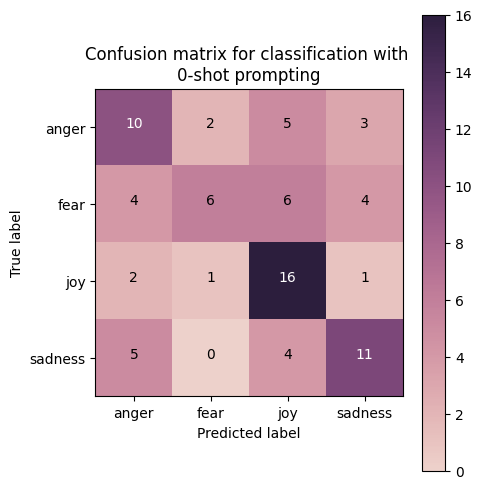

In [83]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with zero-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=0)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: I am just so bitter today 😐
Class: anger

Text: “ Less sugar, more fruit.\n Less soda, more water.\n Less worry, more sleep.\n LESS WORDS, MORE ACTION.”
Class: fear

Text: For a moment I found myself smiling
Class: joy

Text: At my funeral, when they close the casket, I want them to play, 'Call recording has completed.'' -@GlenEwing #lost #podcasting #talkshoe
Class: sadness




Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:19<00:05,  1.04s/it]

Rate limit of 15 requests per minute reached. Waiting for 40.30 seconds.


Processing samples for emotion: anger...:  80%|████████  | 16/20 [01:00<00:52, 13.13s/it]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 32.849016479s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: fear...:  50%|█████     | 10/20 [00:08<00:07,  1.34it/s]

Rate limit of 15 requests per minute reached. Waiting for 31.58 seconds.


Processing samples for emotion: fear...:  60%|██████    | 12/20 [00:41<01:00,  7.55s/it]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 31.928992094s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: joy...:  25%|██▌       | 5/20 [00:03<00:11,  1.33it/s]

Rate limit of 15 requests per minute reached. Waiting for 32.31 seconds.


Processing samples for emotion: sadness...:   0%|          | 0/20 [00:00<?, ?it/s]

Rate limit of 15 requests per minute reached. Waiting for 40.60 seconds.


Processing samples for emotion: sadness...:   5%|▌         | 1/20 [00:41<13:12, 41.73s/it]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 32.650429208s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: sadness...:  75%|███████▌  | 15/20 [01:06<00:04,  1.16it/s]

Rate limit of 15 requests per minute reached. Waiting for 33.76 seconds.


Processing samples for emotion: sadness...:  85%|████████▌ | 17/20 [01:42<00:23,  7.89s/it]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 32.325128238s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: sadness...: 100%|██████████| 20/20 [02:00<00:00,  6.01s/it]


Results saved to ./results/llm_classification_results/results_samples_20_shots_1.csv
Accuracy: 60.00%
              precision    recall  f1-score   support

       anger       0.52      0.65      0.58        20
        fear       0.80      0.40      0.53        20
         joy       0.62      0.75      0.68        20
     sadness       0.57      0.60      0.59        20

    accuracy                           0.60        80
   macro avg       0.63      0.60      0.59        80
weighted avg       0.63      0.60      0.59        80



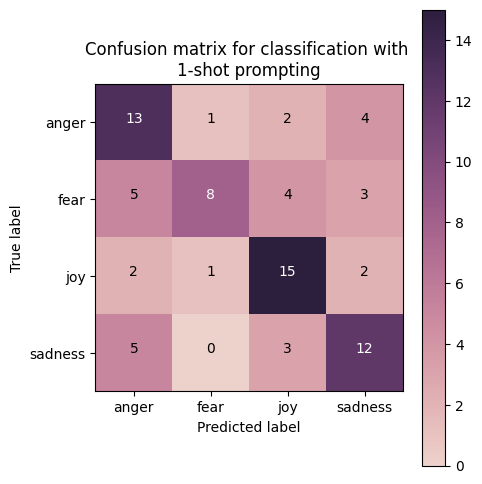

In [86]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 1-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=1)


You will be given a text extracted from social media and your task is to classify the text into one of the following emotion categories: 
"anger" | "fear" | "joy" | "sadness"
    

Examples: 
Text: I am just so bitter today 😐
Class: anger

Text: Bloody parking ticket 😒💸 
Class: anger

Text: @serendipity127_ @zombiecalorie @Angel_Eyes66 I'm sensing a theme here tho lol 
Class: anger

Text: Don't be bitter
Class: anger

Text: straight people are canoodling on the quad and I'm 
Class: anger

Text: “ Less sugar, more fruit.\n Less soda, more water.\n Less worry, more sleep.\n LESS WORDS, MORE ACTION.”
Class: fear

Text: Idk if it's hella hot in here or I'm nervous
Class: fear

Text: What a shamefull, unequal, dangerous and worrying world we live in nowadays!  #terrifying #Charlotte #terrorism #shitworldforourkids
Class: fear

Text: Didn't concede yet but having a nightmare at the back #MUFC
Class: fear

Text: #India right of reply at #UNGA - #Pakistan preaching of human rights is by a cou

Processing samples for emotion: anger...:  65%|██████▌   | 13/20 [00:12<00:07,  1.02s/it]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 38.502262708s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: anger...:  75%|███████▌  | 15/20 [00:29<00:20,  4.08s/it]

Rate limit of 15 requests per minute reached. Waiting for 30.69 seconds.


Processing samples for emotion: fear...:  95%|█████████▌| 19/20 [00:20<00:01,  1.38s/it]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 11.411181833s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: joy...:  75%|███████▌  | 15/20 [00:12<00:04,  1.13it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 12.068142007s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions':

Processing samples for emotion: sadness...:  55%|█████▌    | 11/20 [00:08<00:07,  1.27it/s]

Error occurred when generating response, error: 429 RESOURCE_EXHAUSTED. {'error': {'code': 429, 'message': 'You exceeded your current quota, please check your plan and billing details. For more information on this error, head to: https://ai.google.dev/gemini-api/docs/rate-limits. To monitor your current usage, head to: https://ai.dev/usage?tab=rate-limit. \n* Quota exceeded for metric: generativelanguage.googleapis.com/generate_content_free_tier_requests, limit: 15, model: gemini-2.5-flash-lite\nPlease retry in 9.9076361s.', 'status': 'RESOURCE_EXHAUSTED', 'details': [{'@type': 'type.googleapis.com/google.rpc.Help', 'links': [{'description': 'Learn more about Gemini API quotas', 'url': 'https://ai.google.dev/gemini-api/docs/rate-limits'}]}, {'@type': 'type.googleapis.com/google.rpc.QuotaFailure', 'violations': [{'quotaMetric': 'generativelanguage.googleapis.com/generate_content_free_tier_requests', 'quotaId': 'GenerateRequestsPerMinutePerProjectPerModel-FreeTier', 'quotaDimensions': {'

Processing samples for emotion: sadness...: 100%|██████████| 20/20 [01:07<00:00,  3.37s/it]



Results saved to ./results/llm_classification_results/results_samples_20_shots_5.csv
Accuracy: 65.00%
              precision    recall  f1-score   support

       anger       0.62      0.65      0.63        20
        fear       0.64      0.45      0.53        20
         joy       0.67      0.80      0.73        20
     sadness       0.67      0.70      0.68        20

    accuracy                           0.65        80
   macro avg       0.65      0.65      0.64        80
weighted avg       0.65      0.65      0.64        80



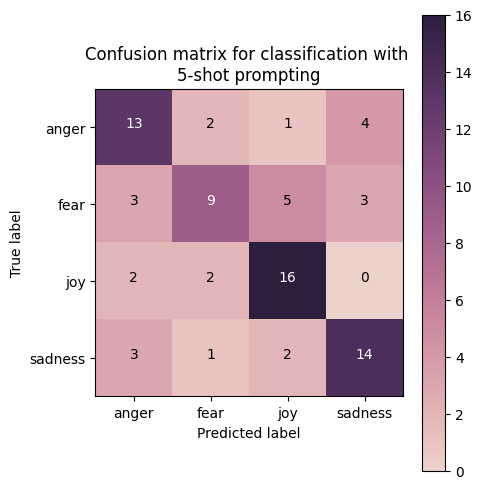

In [87]:
# If you see '429 RESOURCE_EXHAUSTED' errors it's fine, wait until the data gets processed, it will keep retrying until it finishes

# Example of running the experiment with 5-shot prompting
run_experiment(train_df, test_df, num_test_samples=20, num_shots=5)

---
##### <a id='toc1_5_10_1_1_'></a>[**>>> Exercise 6 (Take home):**](#toc0_)

Compare and discuss the overall results of the zero-shot, 1-shot and 5-shot classification.

In [ ]:
# Answer here

0 shot got the lowest accuracy(0.56) since the model has no example to learn.
In 1 shot, the accuracy improves(0.63) since the model has one example per category ti learn from.
5 shot got the highest accuracy(0.65) since the model has more example to learn from.

Also, recall and f1-score improve as the number of shots increases.
While the number of shots increases, the accuracy tends to improve because the model has more
example to learn and classify better the emotion categoties.

---
##### <a id='toc1_5_10_1_2_'></a>[**>>> Exercise 7 (Take home):**](#toc0_)

**Case Study:** Check the results' files inside the `results/llm_classification_results` directory and find cases where the **text classification improves with more examples** (pred emotion is right with examples), **cases where it does not improve** (pred emotion always wrong) and **cases where the classification got worse with more examples** (pred emotion goes from right to wrong with examples). For this you need to load the results with pandas and handle the data using its dataframe functions. Discuss about the findings.

In [89]:
# Answer here
import pandas as pd

df0 = pd.read_csv("results/llm_classification_results/results_samples_20_shots_0.csv")
df1 = pd.read_csv("results/llm_classification_results/results_samples_20_shots_1.csv")
df5 = pd.read_csv("results/llm_classification_results/results_samples_20_shots_5.csv")


In [94]:
print(df0.head())
print(df1.head())
print(df5.head())

                                                text true_emotion  \
0  @DxfyingGrxvity - frustration, looking up at E...        anger   
1  I miss my gran singing Rawhide, in her deep ba...        anger   
2  Just joined #pottermore and was sorted into HU...        anger   
3  Ok scrubbed hands 5 times before trying to put...        anger   
4  @UKBlogAwards @ModishMale I would always be ho...        anger   

  predicted_emotion  
0             anger  
1           sadness  
2             anger  
3              fear  
4               joy  
                                                text true_emotion  \
0  @DxfyingGrxvity - frustration, looking up at E...        anger   
1  I miss my gran singing Rawhide, in her deep ba...        anger   
2  Just joined #pottermore and was sorted into HU...        anger   
3  Ok scrubbed hands 5 times before trying to put...        anger   
4  @UKBlogAwards @ModishMale I would always be ho...        anger   

  predicted_emotion  
0             an

In [96]:
merged = pd.DataFrame({
    "text": df0["text"],
    "true": df0["true_emotion"],
    "pred0": df0["predicted_emotion"],
    "pred1": df1["predicted_emotion"],
    "pred5": df5["predicted_emotion"],
})
print(merged.head())

                                                text   true    pred0    pred1  \
0  @DxfyingGrxvity - frustration, looking up at E...  anger    anger    anger   
1  I miss my gran singing Rawhide, in her deep ba...  anger  sadness  sadness   
2  Just joined #pottermore and was sorted into HU...  anger    anger    anger   
3  Ok scrubbed hands 5 times before trying to put...  anger     fear     fear   
4  @UKBlogAwards @ModishMale I would always be ho...  anger      joy      joy   

     pred5  
0    anger  
1  sadness  
2    anger  
3     fear  
4     fear  


In [102]:
improved = merged[(merged["pred0"] != merged["true"]) &
                  (merged["pred5"] == merged["true"])]

pd.set_option('display.max_colwidth', None)
print("Improved cases")
print(improved[["text", "true", "pred0", "pred1", "pred5"]])

Improved cases
                                                                                                                                       text  \
12    @Jen_ny69 People will always get offended everyone's situation is different! Just because we have kids doesn't mean we have to settle   
17                                                                                         @LeonWobYP b***er off. NCFC is a grudge match :)   
19                                                        @ArcticFantasy I would have almost took offense to this if I actually snapped you   
21                                                                                     @joey_coops yes Hun! Avoid at all costs!! #nightmare   
25  “We can easily #forgive a #child who is #afraid of the #dark; the real #tragedy of #life is when #men are #afraid of the #light.”–Plato   
39             The 2nd step to beating #anxiety or #depression is realising that it's not about waiting for ...., Take action y

In [104]:
not_improve = merged[(merged["pred0"] != merged["true"]) &
                   (merged["pred1"] != merged["true"]) &
                   (merged["pred5"] != merged["true"])]

pd.set_option('display.max_colwidth', None)
print("No improvement")
print(not_improve[["text", "true", "pred0", "pred1", "pred5"]])


No improvement
                                                                                                                                           text  \
1                                                                                   I miss my gran singing Rawhide, in her deep baritone growl.   
3   Ok scrubbed hands 5 times before trying to put them in.\nEyeballs #burning \n#EvenMoreBlind accidentally scared the #cat whilst #screeching   
4      @UKBlogAwards @ModishMale I would always be honest but it's great to feedback opinion to the brand - don't want to offend them #BlogHour   
9                                                                                                @__NETFLIXNCHILL I fuck with madden way harder   
11                                                                                                         I hope my hustle don't offend nobody   
14          Having a baby born too soon is #lifechanging 6 years on and it feels like only yesterday #s

In [105]:
worse = merged[(merged["pred0"] == merged["true"]) &
               (merged["pred5"] != merged["true"])]

pd.set_option('display.max_colwidth', None)
print("Worse cases")
print(worse[["text", "true", "pred0", "pred5"]])

Worse cases
Empty DataFrame
Columns: [text, true, pred0, pred5]
Index: []


some results improve when using more shots, e.g. 
" “We can easily #forgive a #child who is #afraid of the #dark; the real #tragedy of #life is when #men are #afraid of the #light.”–Plato "
this sentence is easier be confused between "sadness" and "fear", it is classified as "sadness" with 0 shot 
while after adding more examples, it is correctly classified as "fear" when using 1 and 5 shots.

some results didn't improve even with more shots, e.g.
"74  If you #invest in my new #film I will stop asking you to invest in my new film. #concessions #crime #despair #shortsightedness #celebrities "
this sentence was classified as "anger" when using 0 and 1 shot and "fear" when using 5 shots,
while the true emotion is "sadness", probably because the sentance multiple emotional cues,
making model hard to identify the main emotion.


---
### <a id='toc1_5_11_'></a>[**2.7 Extra LLM Related Materials:**](#toc0_)
So this will be it for the lab, but here are some extra materials if you would like to explore:

- **How to use OpenAI ChatGPT model's API (Not Free API):** [Basics Video](https://www.youtube.com/watch?v=e9P7FLi5Zy8), [Basics GitHub](https://github.com/gkamradt/langchain-tutorials/blob/main/chatapi/ChatAPI%20%2B%20LangChain%20Basics.ipynb), [RAG's Basics Video](https://www.youtube.com/watch?v=9AXP7tCI9PI&t=300s), [RAG's Basics GitHub](https://github.com/techleadhd/chatgpt-retrieval)

- **Advanced topic - QLoRA (Quantized Low-Rank Adapter):** QLoRA is a method used to make fine-tuning large language models more efficient. It works by adding a small, trainable part (LoRA) to a pre-trained model, while keeping the rest of the model frozen. At the same time, it reduces the size of the model’s data using a process called quantization, which makes the model require less memory. This allows you to fine-tune large models without needing as much computational power, making it easier to adapt models for specific tasks. Materials: [Paper GitHub](https://github.com/artidoro/qlora?tab=readme-ov-file), [Llama 3 Application Video](https://www.youtube.com/watch?v=YJNbgusTSF0&t=512s),[Llama 3 Application GitHub](https://github.com/adidror005/youtube-videos/blob/main/LLAMA_3_Fine_Tuning_for_Sequence_Classification_Actual_Video.ipynb)

- **How to Fine-tune and run local LLMs with the `unsloth` library:** [unsloth tutorials](https://docs.unsloth.ai/models/tutorials-how-to-fine-tune-and-run-llms)

- **Google's Agent Development Kit Documentation:** [ADK](https://google.github.io/adk-docs/)

- **Build AI agents with LangGraph:** [LangGraph Documentation](https://langchain-ai.github.io/langgraph/concepts/why-langgraph/)

---